# Tiffany's Analysis

## Imports


In [1]:
# Imports
import pandas as pd
import numpy as np
from plotnine import *

# Data Preprocessing
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Imports
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, LassoCV, RidgeCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from scipy.stats import chi2_contingency, loguniform


# performance
from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# pipeline imports
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer

In [2]:
from os import environ
from google.colab import drive

# if we are starting here we need to remount our drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## **Data Preprocessing**

In [3]:
# read data in
revenue = pd.read_csv("/content/drive/MyDrive/JuniorYear/CPSC392/CPSC_392_FinalProject/csv_files/Genshin_Revenue.csv")
character = pd.read_csv("/content/drive/MyDrive/JuniorYear/CPSC392/CPSC_392_FinalProject/csv_files/new_data/Genshin_Character_Data.xlsx - Character (5).csv")
weapon = pd.read_csv("/content/drive/MyDrive/JuniorYear/CPSC392/CPSC_392_FinalProject/csv_files/Genshin_Weapon.csv")

In [4]:
character.columns

Index(['character_name', 'rarity', 'team_role', 'main_DPS_rating',
       'sub_DPS_rating', 'support_rating', 'flexibility', 'region',
       'elemental_power', 'arkhe', 'weapon_type', 'model', 'constellation',
       'birthday_year', 'birthday', 'special_dish', 'affiliation',
       'release_date', 'limited', 'voice_eng', 'voice_cn', 'voice_jp',
       'voice_kr', 'ascension', 'ascension_specialty', 'ascension_material',
       'ascension_boss', 'talent_material', 'talent_book_1-6',
       'talent_book_7-10', 'talent_weekly', 'hp_90_90', 'atk_90_90',
       'def_90_90', 'hp_80_90', 'atk_80_90', 'def_80_90', 'hp_80_80',
       'atk_80_80', 'def_80_80', 'hp_70_80', 'atk_70_80', 'def_70_80',
       'hp_70_70', 'atk_70_70', 'def_70_70', 'hp_60_70', 'atk_60_70',
       'def_60_70', 'hp_60_60', 'atk_60_60', 'def_60_60', 'hp_50_60',
       'atk_50_60', 'def_50_60', 'hp_50_50', 'atk_50_50', 'def_50_50',
       'hp_40_50', 'atk_40_50', 'def_40_50', 'hp_40_40', 'atk_40_40',
       'def_40_40', 

## **Q3**
**Question:** When predicting a Character’s Rarity, which predictor “Lore-Related” features or their “Playstyle Stats” improves the Accuracy the most compared to a model with all other variables except itself?

The prediction will be conducted by one of the three Classification Models that we tested the data on. The chosen model will be one that reduces overfitting/underfitting and provides the highest accuracy.

### Data Preprocessing

In [5]:
# convert birthday to zodiac sign
def extract_zodiac(birthday):
    if birthday == 'N/A':
        return 'N/A'
    if pd.notna(birthday):
        # Adjust the format to "%m/%d" since the data has the format "9/12"
        birth_date = datetime.strptime(birthday, "%m/%d")
        month = birth_date.month
        day = birth_date.day
        if (month == 3 and day >= 21) or (month == 4 and day <= 19):
            return 'Aries'
        elif (month == 4 and day >= 20) or (month == 5 and day <= 20):
            return 'Taurus'
        elif (month == 5 and day >= 21) or (month == 6 and day <= 20):
            return 'Gemini'
        elif (month == 6 and day >= 21) or (month == 7 and day <= 22):
            return 'Cancer'
        elif (month == 7 and day >= 23) or (month == 8 and day <= 22):
            return 'Leo'
        elif (month == 8 and day >= 23) or (month == 9 and day <= 22):
            return 'Virgo'
        elif (month == 9 and day >= 23) or (month == 10 and day <= 22):
            return 'Libra'
        elif (month == 10 and day >= 23) or (month == 11 and day <= 21):
            return 'Scorpio'
        elif (month == 11 and day >= 22) or (month == 12 and day <= 21):
            return 'Sagittarius'
        elif (month == 12 and day >= 22) or (month == 1 and day <= 19):
            return 'Capricorn'
        elif (month == 1 and day >= 20) or (month == 2 and day <= 18):
            return 'Aquarius'
        else:
            return 'Pisces'
    else:
        return 'No birthday provided'



In [62]:
# Apply the function on the character's birthday
character['zodiac_sign'] = character['birthday'].apply(extract_zodiac)

# Split "model" into "Gender and Height"
character[['Height', 'Gender']] = character['model'].str.split(expand = True)

# Split the variables into independent and dependent
predictors = ['region', 'elemental_power', 'zodiac_sign', 'Height', 'Gender', 'weapon_type', 'flexibility', 'ascension', 'hp_90_90', 'atk_90_90', 'def_90_90']

lore = ['region', 'elemental_power', 'zodiac_sign', 'Height', 'Gender']
stats = ['weapon_type', 'flexibility', 'ascension', 'hp_90_90', 'atk_90_90', 'def_90_90']


### **Gradient Boosting Classifier Model**
**Classification Model**

*   Logistic Regression
* Random Forest Classifier
* Gradient Boosting



### **Model: Character's Lore**

In [63]:
X = character[lore]
y = character["rarity"]

# Check if there is multicollinearity in the predictors
for col1 in X.columns:
    for col2 in X.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(X[col1], X[col2])
            _, p_value, _, _ = chi2_contingency(contingency_table)
            if p_value < 0.05:
                print(f"Chi-square test is significant for {col1} and {col2}.")

Chi-square test is significant for region and elemental_power.
Chi-square test is significant for region and zodiac_sign.
Chi-square test is significant for elemental_power and region.
Chi-square test is significant for zodiac_sign and region.
Chi-square test is significant for Height and Gender.
Chi-square test is significant for Gender and Height.


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

categorical_pipe = Pipeline([('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

z = make_column_transformer((categorical_pipe, lore),
                            remainder = "passthrough")

#### **Logistic Regression**

Train Accuracy: 0.7619047619047619
Test Accuracy: 0.5185185185185185


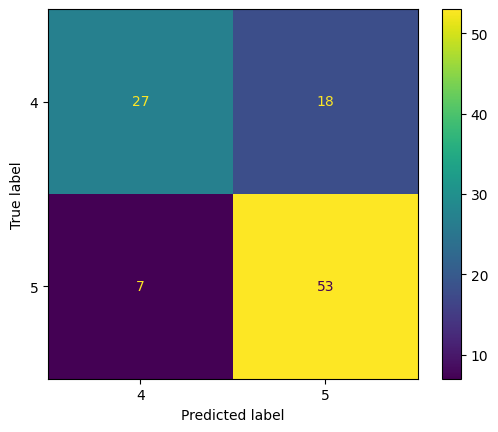

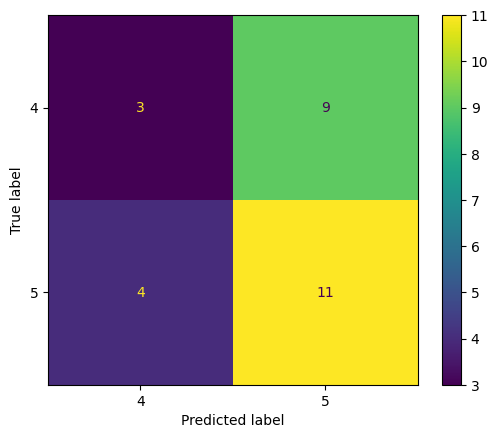

In [9]:
lr = LogisticRegression(penalty='l2', solver='liblinear', C=0.1)

pipe = Pipeline([("pre", z),
                 ("model", lr)])


pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

y_pred_train_prob = pipe.predict_proba(X_train)[:,1]
y_pred_test_prob = pipe.predict_proba(X_test)[:,1]

# Check training accuracy
train_accuracy_lore_log = accuracy_score(y_pred_train, y_train)
print("Train Accuracy:", train_accuracy_lore_log)

# Display confusion matrix for training set
ConfusionMatrixDisplay.from_estimator(pipe, X_train, y_train)

# Check test accuracy
test_accuracy_lore_log = accuracy_score(y_pred_test, y_test)
print("Test Accuracy:", test_accuracy_lore_log)

# Display confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

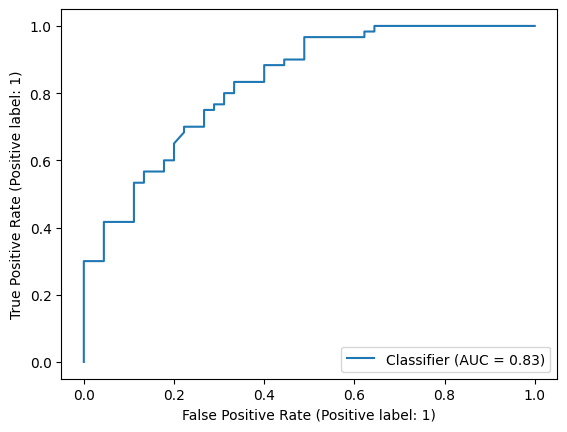

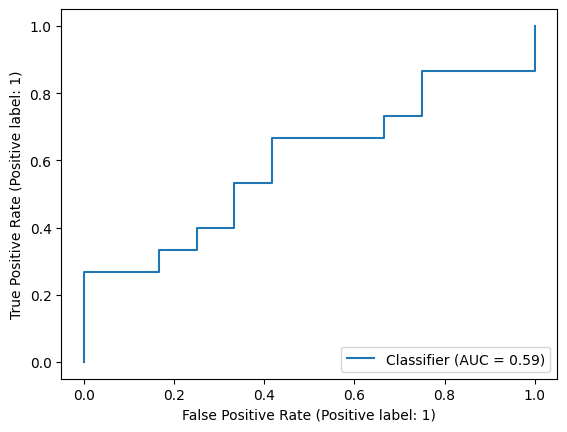

In [10]:
y_train_binary = np.where(y_train == 4, 0, 1)
y_test_binary = np.where(y_test == 4, 0, 1)
# Plotting the ROC curves
display_train = RocCurveDisplay.from_predictions(y_train_binary, y_pred_train_prob)
display_test = RocCurveDisplay.from_predictions(y_test_binary, y_pred_test_prob)

In [11]:
# Classification-specific metrics dictionaries
accuracy = {"train": [], "test": []}
precision = {"train": [], "test": []}
recall = {"train": [], "test": []}
f1 = {"train": [], "test": []}
conf_matrix = {"train": [], "test": []}

kf = KFold(5)

# Loop Over Folds
for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]

    # fit
    pipe.fit(X_train, y_train)

    # predict
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    # assess
    accuracy["train"].append(accuracy_score(y_train, y_pred_train))
    accuracy["test"].append(accuracy_score(y_test, y_pred_test))

    precision["train"].append(precision_score(y_train, y_pred_train, average='binary', pos_label=4))
    precision["test"].append(precision_score(y_test, y_pred_test, average='binary', pos_label=4))

    # Specify pos_label explicitly
    recall["train"].append(recall_score(y_train, y_pred_train, pos_label=4))
    recall["test"].append(recall_score(y_test, y_pred_test, pos_label=4))

    f1["train"].append(f1_score(y_train, y_pred_train, pos_label=4))
    f1["test"].append(f1_score(y_test, y_pred_test, pos_label=4))

    conf_matrix["train"].append(confusion_matrix(y_train, y_pred_train))
    conf_matrix["test"].append(confusion_matrix(y_test, y_pred_test))

# Print out the Classification Performance Evaluations
print("Train Accuracy:", accuracy["train"])
print("Test Accuracy :", accuracy["test"])
print("Train Accuracy Mean:", np.mean(accuracy["train"]))
print("Test Accuracy Mean :", np.mean(accuracy["test"]))

print("Train Precision:", precision["train"])
print("Test Precision :", precision["test"])
print("Train Precision Mean:", np.mean(precision["train"]))
print("Test Precision Mean :", np.mean(precision["test"]))

print("Train Recall:", recall["train"])
print("Test Recall :", recall["test"])
print("Train Recall Mean:", np.mean(recall["train"]))
print("Test Recall Mean :", np.mean(recall["test"]))

print("Train F1 Score:", f1["train"])
print("Test F1 Score :", f1["test"])
print("Train F1 Score Mean:", np.mean(f1["train"]))
print("Test F1 Score Mean :", np.mean(f1["test"]))


Train Accuracy: [0.7142857142857143, 0.7428571428571429, 0.7075471698113207, 0.7075471698113207, 0.7547169811320755]
Test Accuracy : [0.5555555555555556, 0.48148148148148145, 0.5, 0.6153846153846154, 0.5769230769230769]
Train Accuracy Mean: 0.7253908355795147
Test Accuracy Mean : 0.5458689458689457
Train Precision: [0.8095238095238095, 0.7666666666666667, 0.7368421052631579, 0.7272727272727273, 0.7692307692307693]
Test Precision : [0.6666666666666666, 0.5, 0.14285714285714285, 0.5555555555555556, 0.4444444444444444]
Train Precision Mean: 0.7619072155914262
Test Precision Mean : 0.4619047619047619
Train Recall: [0.3953488372093023, 0.5348837209302325, 0.5714285714285714, 0.5217391304347826, 0.6382978723404256]
Test Recall : [0.2857142857142857, 0.42857142857142855, 0.125, 0.45454545454545453, 0.4]
Train Recall Mean: 0.5323396264686628
Test Recall Mean : 0.33876623376623377
Train F1 Score: [0.53125, 0.6301369863013698, 0.6436781609195403, 0.6075949367088608, 0.6976744186046512]
Test F1 S

#### **Random Forest Classifier**

Train Accuracy: 0.6886792452830188
Test Accuracy: 0.5384615384615384


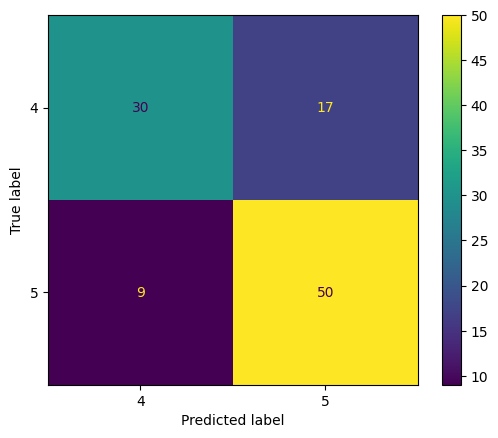

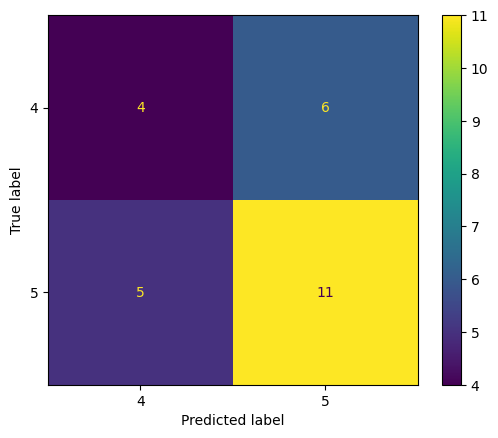

In [12]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=15, max_depth=3, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', random_state=42)

# Create Pipeline
pipe_cat = Pipeline([
    ("z", z),
    ("tree", rf)
])

# fit
pipe_cat.fit(X_train, y_train)

# predict
y_pred_train = pipe_cat.predict(X_train)
y_pred_test = pipe_cat.predict(X_test)

y_pred_train_prob = pipe_cat.predict_proba(X_train)[:,1]
y_pred_test_prob = pipe_cat.predict_proba(X_test)[:,1]

# Check training accuracy
train_accuracy_lore_rf = accuracy_score(y_pred_train, y_train)
print("Train Accuracy:", train_accuracy_lore_rf)

# Display confusion matrix for training set
ConfusionMatrixDisplay.from_estimator(pipe, X_train, y_train)

# Check test accuracy
test_accuracy_lore_rf = accuracy_score(y_pred_test, y_test)
print("Test Accuracy:", test_accuracy_lore_rf)

# Display confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

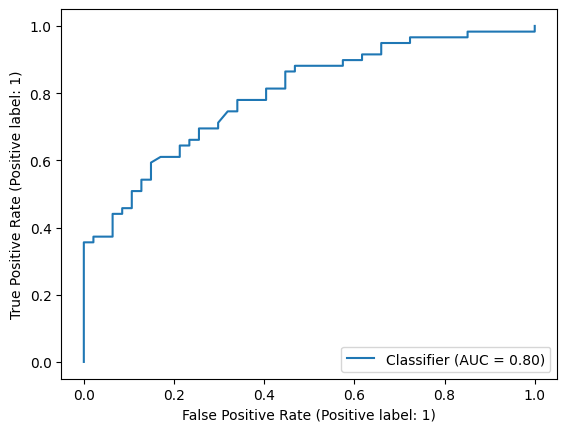

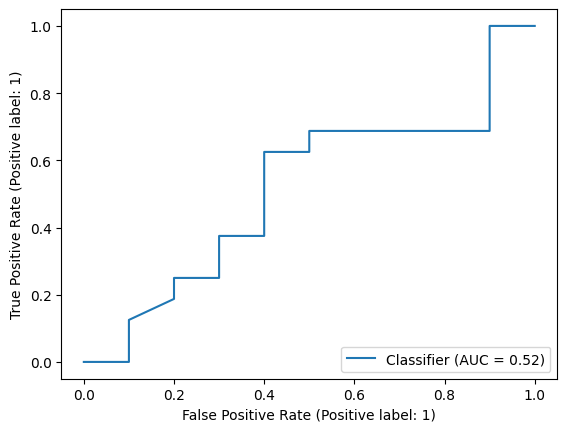

In [13]:
y_train_binary = np.where(y_train == 4, 0, 1)
y_test_binary = np.where(y_test == 4, 0, 1)
# Plotting the ROC curves
display_train = RocCurveDisplay.from_predictions(y_train_binary, y_pred_train_prob)
display_test = RocCurveDisplay.from_predictions(y_test_binary, y_pred_test_prob)

#### Hyperparameter Tuning
* Random Search CV - Random Forest Classifier
* Recommend the number of estimators to use, max depth of tree, and the random state

In [14]:
# Random Search CV
param_grid = {
    'tree__n_estimators': [25, 50, 100],
    'tree__max_depth': [3, 5, 7],
    'tree__min_samples_split': [10, 20, 30],
    'tree__min_samples_leaf': [1, 2, 5],
    'tree__max_features': ['sqrt', 'log2']
}

# use grid search to find best parameters
grid = RandomizedSearchCV(pipe_cat, param_distributions=param_grid, cv = 5, refit = True)

grid.fit(X_train, y_train)

print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__n_estimators"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__max_depth"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__min_samples_split"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__min_samples_leaf"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__max_features"])

RandomizedSearchCV chose:  100
RandomizedSearchCV chose:  7
RandomizedSearchCV chose:  10
RandomizedSearchCV chose:  5
RandomizedSearchCV chose:  sqrt


#### **Gradient Boosting Classifier**

In [68]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=50, max_depth=5, min_samples_split=20, learning_rate=0.01, random_state=1234, n_iter_no_change=5, tol=0.01)

# Create Pipeline
gp_pipe = Pipeline([
    ("z", z),
    ("tree", gb)
])

# fit
gp_pipe.fit(X_train, y_train)

Pipeline(steps=[('z',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['region', 'elemental_power',
                                                   'zodiac_sign', 'Height',
                                                   'Gender'])])),
                ('tree',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=5,
                                            min_samples_split=20,
                                            n_estimators=50, n_iter_no_change=5,
                                            random_state=1234, tol=0.01))])

In [69]:
# predict
y_pred_train = gp_pipe.predict(X_train)
y_pred_test = gp_pipe.predict(X_test)

y_pred_train_prob = gp_pipe.predict_proba(X_train)[:,1]
y_pred_test_prob = gp_pipe.predict_proba(X_test)[:,1]

# Check training accuracy
train_accuracy_lore_gbc = accuracy_score(y_pred_train, y_train)
print("Train Accuracy:", train_accuracy_lore_gbc)

# Display confusion matrix for training set
ConfusionMatrixDisplay.from_estimator(pipe, X_train, y_train)

# Check test accuracy
test_accuracy_lore_gbc = accuracy_score(y_pred_test, y_test)
print("Test Accuracy:", test_accuracy_lore_gbc)

# Display confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

Train Accuracy: 0.638095238095238


ValueError: ignored

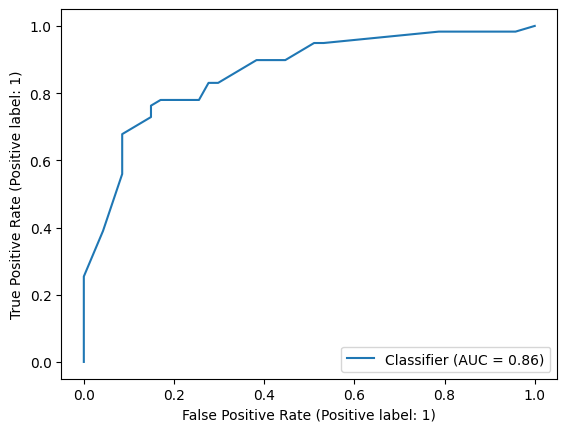

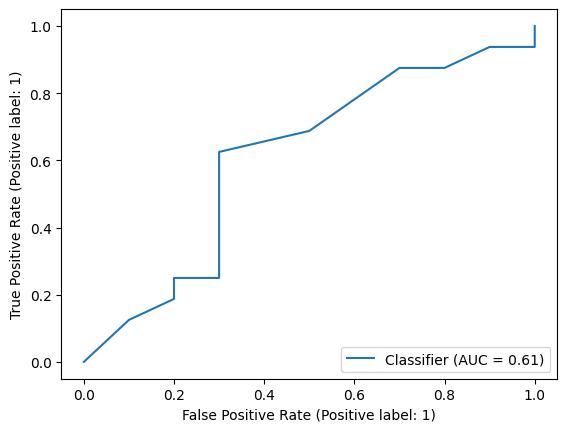

In [17]:
y_train_binary = np.where(y_train == 4, 0, 1)
y_test_binary = np.where(y_test == 4, 0, 1)
# Plotting the ROC curves
display_train = RocCurveDisplay.from_predictions(y_train_binary, y_pred_train_prob)
display_test = RocCurveDisplay.from_predictions(y_test_binary, y_pred_test_prob)

In [18]:
# Define the hyperparameter grid
param_dist = {
    'tree__n_estimators': [25, 50, 100, 150],
    'tree__max_depth': [3, 5, 7, 9],
    'tree__min_samples_split': [2, 3, 4, 5, 10, 15],
    'tree__max_leaf_nodes': [2, 5, 10, 20, 50, 100],
    'tree__learning_rate': loguniform(0.01, 1),
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    gp_pipe,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'tree__learning_rate': 0.02310201887845294, 'tree__max_depth': 3, 'tree__max_leaf_nodes': 2, 'tree__min_samples_split': 5, 'tree__n_estimators': 50}


### **Model: Character's Playstyle**

In [19]:
X = character[stats]
y = character["rarity"]

cont = ['hp_90_90', 'atk_90_90', 'def_90_90']
cat = ['weapon_type', 'flexibility', 'ascension']

# Check if there is multicollinearity in the predictors
for col1 in X.columns:
    for col2 in X.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(X[col1], X[col2])
            _, p_value, _, _ = chi2_contingency(contingency_table)
            if p_value < 0.05:
                print(f"Chi-square test is significant for {col1} and {col2}.")

Chi-square test is significant for weapon_type and flexibility.
Chi-square test is significant for weapon_type and hp_90_90.
Chi-square test is significant for weapon_type and def_90_90.
Chi-square test is significant for flexibility and weapon_type.
Chi-square test is significant for flexibility and hp_90_90.
Chi-square test is significant for ascension and atk_90_90.
Chi-square test is significant for ascension and def_90_90.
Chi-square test is significant for hp_90_90 and weapon_type.
Chi-square test is significant for hp_90_90 and flexibility.
Chi-square test is significant for hp_90_90 and atk_90_90.
Chi-square test is significant for hp_90_90 and def_90_90.
Chi-square test is significant for atk_90_90 and ascension.
Chi-square test is significant for atk_90_90 and hp_90_90.
Chi-square test is significant for atk_90_90 and def_90_90.
Chi-square test is significant for def_90_90 and weapon_type.
Chi-square test is significant for def_90_90 and ascension.
Chi-square test is signific

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

categorical_pipe = Pipeline([('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

z = make_column_transformer((StandardScaler(), cont),
                            (categorical_pipe, cat),
                            remainder = "passthrough")

#### **Logistic Regression**

Train Accuracy: 0.8952380952380953
Test Accuracy: 0.8148148148148148


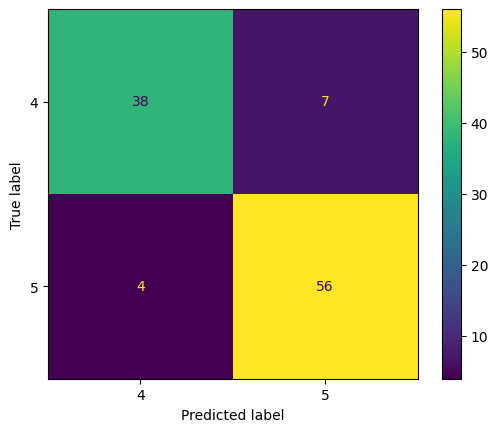

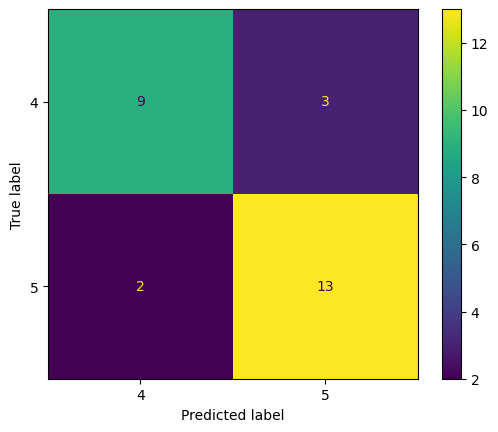

In [21]:
lr = LogisticRegression(penalty='l2', solver='liblinear', C=0.3)

pipe = Pipeline([("pre", z),
                 ("model", lr)])


pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

y_pred_train_prob = pipe.predict_proba(X_train)[:,1]
y_pred_test_prob = pipe.predict_proba(X_test)[:,1]

# Check training accuracy
train_accuracy_stat_lr = accuracy_score(y_pred_train, y_train)
print("Train Accuracy:", train_accuracy_stat_lr)

# Display confusion matrix for training set
ConfusionMatrixDisplay.from_estimator(pipe, X_train, y_train)

# Check test accuracy
test_accuracy_stat_lr = accuracy_score(y_pred_test, y_test)
print("Test Accuracy:", test_accuracy_stat_lr)

# Display confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

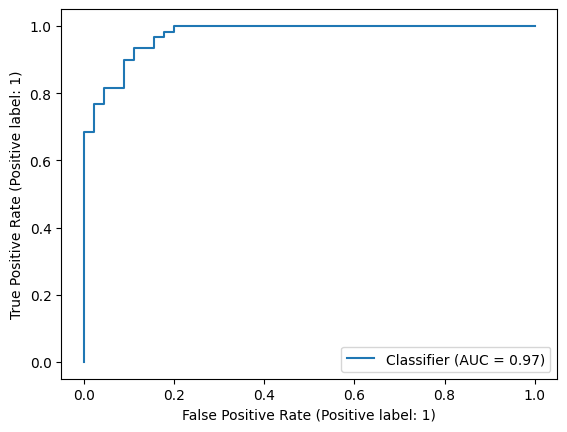

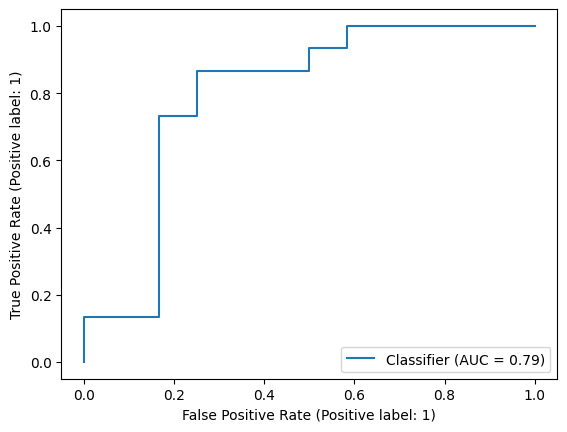

In [22]:
y_train_binary = np.where(y_train == 4, 0, 1)
y_test_binary = np.where(y_test == 4, 0, 1)
# Plotting the ROC curves
display_train = RocCurveDisplay.from_predictions(y_train_binary, y_pred_train_prob)
display_test = RocCurveDisplay.from_predictions(y_test_binary, y_pred_test_prob)

In [23]:
# Classification-specific metrics dictionaries
accuracy = {"train": [], "test": []}
precision = {"train": [], "test": []}
recall = {"train": [], "test": []}
f1 = {"train": [], "test": []}
conf_matrix = {"train": [], "test": []}

kf = KFold(5)

# Loop Over Folds
for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]

    # fit
    pipe.fit(X_train, y_train)

    # predict
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    # assess
    accuracy["train"].append(accuracy_score(y_train, y_pred_train))
    accuracy["test"].append(accuracy_score(y_test, y_pred_test))

    precision["train"].append(precision_score(y_train, y_pred_train, average='binary', pos_label=4))
    precision["test"].append(precision_score(y_test, y_pred_test, average='binary', pos_label=4))

    # Specify pos_label explicitly
    recall["train"].append(recall_score(y_train, y_pred_train, pos_label=4))
    recall["test"].append(recall_score(y_test, y_pred_test, pos_label=4))

    f1["train"].append(f1_score(y_train, y_pred_train, pos_label=4))
    f1["test"].append(f1_score(y_test, y_pred_test, pos_label=4))

    conf_matrix["train"].append(confusion_matrix(y_train, y_pred_train))
    conf_matrix["test"].append(confusion_matrix(y_test, y_pred_test))

# Print out the Classification Performance Evaluations
print("Train Accuracy:", accuracy["train"])
print("Test Accuracy :", accuracy["test"])
print("Train Accuracy Mean:", np.mean(accuracy["train"]))
print("Test Accuracy Mean :", np.mean(accuracy["test"]))

print("Train Precision:", precision["train"])
print("Test Precision :", precision["test"])
print("Train Precision Mean:", np.mean(precision["train"]))
print("Test Precision Mean :", np.mean(precision["test"]))

print("Train Recall:", recall["train"])
print("Test Recall :", recall["test"])
print("Train Recall Mean:", np.mean(recall["train"]))
print("Test Recall Mean :", np.mean(recall["test"]))

print("Train F1 Score:", f1["train"])
print("Test F1 Score :", f1["test"])
print("Train F1 Score Mean:", np.mean(f1["train"]))
print("Test F1 Score Mean :", np.mean(f1["test"]))


Train Accuracy: [0.9047619047619048, 0.9047619047619048, 0.8962264150943396, 0.9056603773584906, 0.9245283018867925]
Test Accuracy : [0.8518518518518519, 0.6666666666666666, 0.5, 0.9230769230769231, 0.6538461538461539]
Train Accuracy Mean: 0.9071877807726864
Test Accuracy Mean : 0.719088319088319
Train Precision: [0.9714285714285714, 0.9230769230769231, 0.9130434782608695, 0.9090909090909091, 0.9333333333333333]
Test Precision : [0.8571428571428571, 0.8571428571428571, 0.38095238095238093, 1.0, 0.5333333333333333]
Train Precision Mean: 0.9299946430381214
Test Precision Mean : 0.7257142857142856
Train Recall: [0.7906976744186046, 0.8372093023255814, 0.8571428571428571, 0.8695652173913043, 0.8936170212765957]
Test Recall : [0.8571428571428571, 0.42857142857142855, 1.0, 0.8181818181818182, 0.8]
Train Recall Mean: 0.8496464145109887
Test Recall Mean : 0.7807792207792208
Train F1 Score: [0.8717948717948717, 0.878048780487805, 0.8842105263157894, 0.888888888888889, 0.9130434782608695]
Test F

#### **Random Forest Classifier**

Train Accuracy: 0.9811320754716981
Test Accuracy: 0.8076923076923077


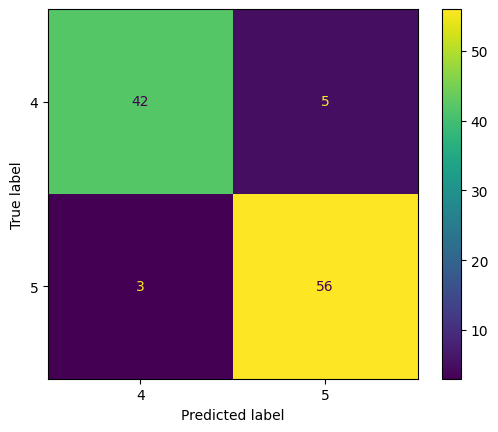

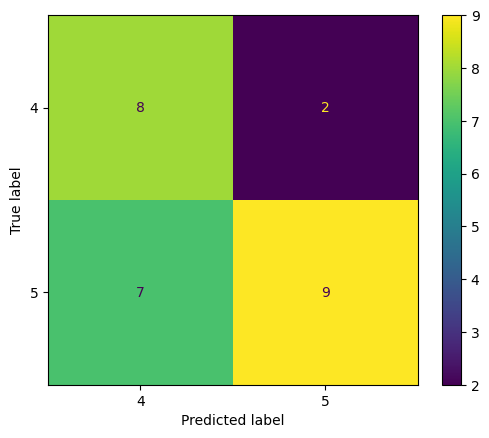

In [24]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=24, max_depth=5, min_samples_split=7, min_samples_leaf=2, max_features='sqrt', random_state=42)

# Create Pipeline
pipe_cat = Pipeline([
    ("z", z),
    ("tree", rf)
])

# fit
pipe_cat.fit(X_train, y_train)

# predict
y_pred_train = pipe_cat.predict(X_train)
y_pred_test = pipe_cat.predict(X_test)

y_pred_train_prob = pipe_cat.predict_proba(X_train)[:,1]
y_pred_test_prob = pipe_cat.predict_proba(X_test)[:,1]

# Check training accuracy
train_accuracy_stat_rf = accuracy_score(y_pred_train, y_train)
print("Train Accuracy:", train_accuracy_stat_rf)

# Display confusion matrix for training set
ConfusionMatrixDisplay.from_estimator(pipe, X_train, y_train)

# Check test accuracy
test_accuracy_stat_rf = accuracy_score(y_pred_test, y_test)
print("Test Accuracy:", test_accuracy_stat_rf)

# Display confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

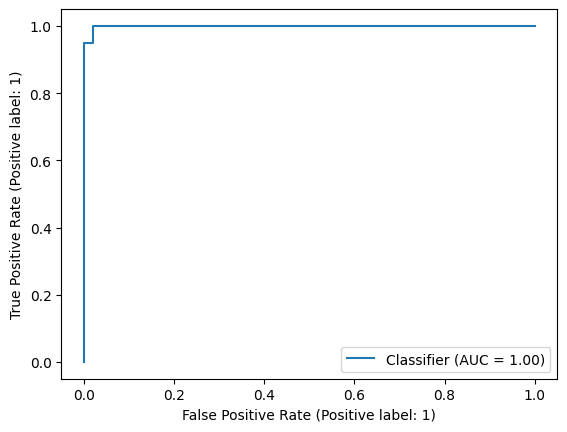

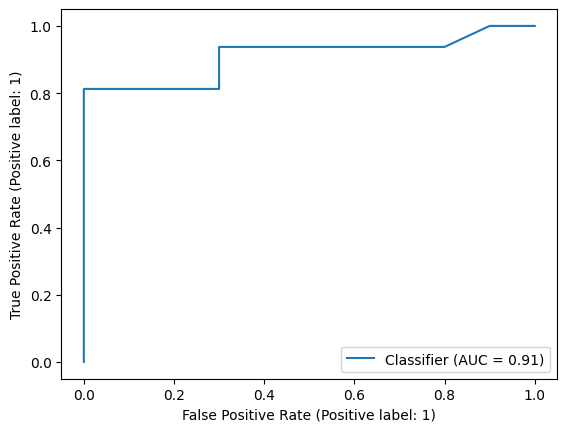

In [25]:
# Assuming your original labels are {4, 5}
y_train_binary = np.where(y_train == 4, 0, 1)
y_test_binary = np.where(y_test == 4, 0, 1)
# Plotting the ROC curves
display_train = RocCurveDisplay.from_predictions(y_train_binary, y_pred_train_prob)
display_test = RocCurveDisplay.from_predictions(y_test_binary, y_pred_test_prob)

In [26]:
# Perform cross-validation
cross_val_scores = cross_val_score(pipe_cat, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.90909091 0.80952381 0.9047619  0.85714286 0.66666667]
Mean Cross-Validation Score: 0.8294372294372294


#### Hyperparameter Tuning
* Random Search CV - Random Forest Classifier
* Recommend the number of estimators to use, max depth of tree, and the random state

In [27]:
# Random Search CV
param_dist = {
    'tree__n_estimators': [10, 15, 24, 25, 50, 100, 150],
    'tree__max_depth': [3, 5, 7, 9],
    'tree__min_samples_split' : [2, 5, 7, 10, 15, 20],
    'tree__min_samples_leaf' : [2, 5, 7, 10, 15],
    'tree__max_features' : ['sqrt', 'log2', None]
}

# use grid search to find best parameters
grid = RandomizedSearchCV(pipe_cat, param_distributions=param_dist, cv = 5, refit = True)

grid.fit(X_train, y_train)

print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__n_estimators"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__max_depth"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__min_samples_split"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__min_samples_leaf"])

RandomizedSearchCV chose:  10
RandomizedSearchCV chose:  5
RandomizedSearchCV chose:  10
RandomizedSearchCV chose:  2


#### **Gradient Boosting Classifier**

Train Accuracy: 0.9811320754716981
Test Accuracy: 0.8076923076923077


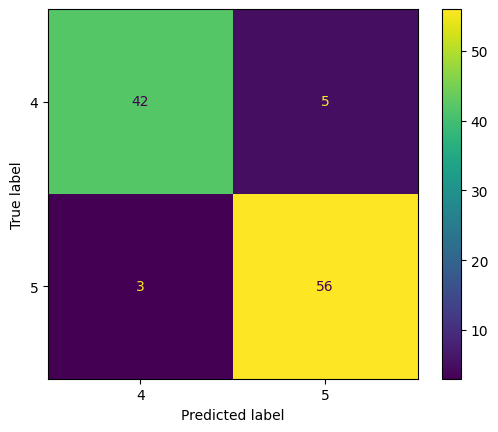

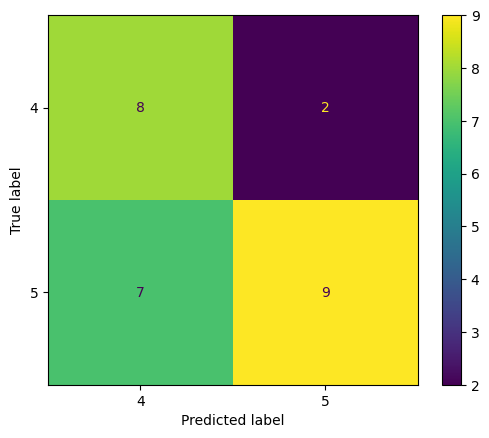

In [28]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=75, max_depth=5, min_samples_split=10, max_leaf_nodes=10, learning_rate=0.1673808578875213, random_state=1234, n_iter_no_change=5, tol=0.01)

# Create Pipeline
gp_pipe = Pipeline([
    ("z", z),
    ("tree", gb)
])

# fit
gp_pipe.fit(X_train, y_train)

# predict
y_pred_train = gp_pipe.predict(X_train)
y_pred_test = gp_pipe.predict(X_test)

y_pred_train_prob = gp_pipe.predict_proba(X_train)[:,1]
y_pred_test_prob = gp_pipe.predict_proba(X_test)[:,1]

# Check training accuracy
train_accuracy_stat_gb= accuracy_score(y_pred_train, y_train)
print("Train Accuracy:", train_accuracy_stat_gb)

# Display confusion matrix for training set
ConfusionMatrixDisplay.from_estimator(pipe, X_train, y_train)

# Check test accuracy
test_accuracy_stat_gb = accuracy_score(y_pred_test, y_test)
print("Test Accuracy:", test_accuracy_stat_gb)

# Display confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

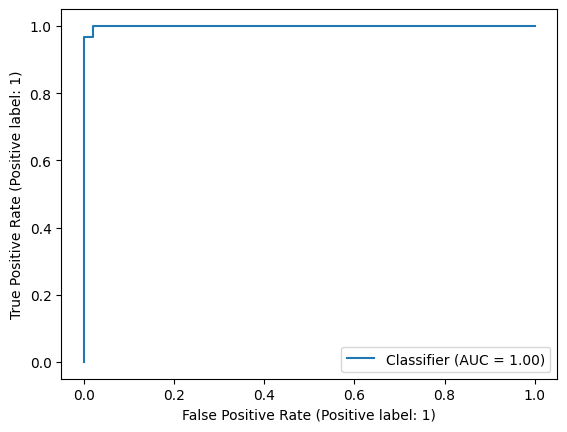

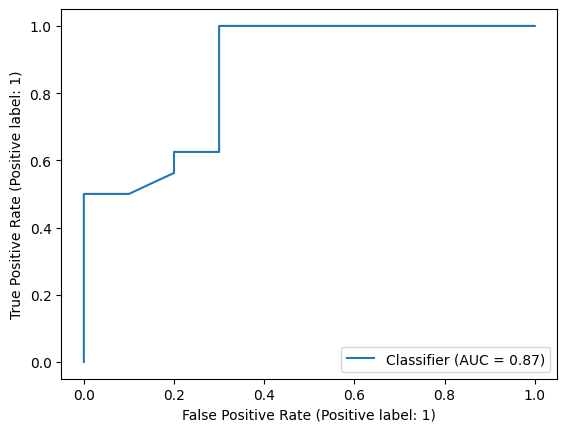

In [29]:
y_train_binary = np.where(y_train == 4, 0, 1)
y_test_binary = np.where(y_test == 4, 0, 1)
# Plotting the ROC curves
display_train = RocCurveDisplay.from_predictions(y_train_binary, y_pred_train_prob)
display_test = RocCurveDisplay.from_predictions(y_test_binary, y_pred_test_prob)

In [30]:
# Define the hyperparameter grid
param_dist = {
    'tree__n_estimators': [25, 50, 100, 150],
    'tree__max_depth': [3, 5, 7, 9],
    'tree__min_samples_split': [2, 3, 4, 5, 10, 15],
    'tree__max_leaf_nodes': [2, 5, 10, 20, 50, 100],
    'tree__learning_rate': loguniform(0.01, 1),
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    gp_pipe,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'tree__learning_rate': 0.1673808578875213, 'tree__max_depth': 5, 'tree__max_leaf_nodes': 20, 'tree__min_samples_split': 5, 'tree__n_estimators': 150}


### **Model: Character's Playstyle & Lore**

In [31]:
X = character[predictors]
y = character["rarity"]

cont = ['hp_90_90', 'atk_90_90', 'def_90_90']
cat = ['weapon_type', 'flexibility', 'ascension', 'region', 'elemental_power', 'zodiac_sign', 'Height', 'Gender']

# Check if there is multicollinearity in the predictors
for col1 in X.columns:
    for col2 in X.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(X[col1], X[col2])
            _, p_value, _, _ = chi2_contingency(contingency_table)
            if p_value < 0.05:
                print(f"Chi-square test is significant for {col1} and {col2}.")

Chi-square test is significant for region and elemental_power.
Chi-square test is significant for region and zodiac_sign.
Chi-square test is significant for region and weapon_type.
Chi-square test is significant for region and def_90_90.
Chi-square test is significant for elemental_power and region.
Chi-square test is significant for elemental_power and ascension.
Chi-square test is significant for zodiac_sign and region.
Chi-square test is significant for zodiac_sign and weapon_type.
Chi-square test is significant for zodiac_sign and ascension.
Chi-square test is significant for zodiac_sign and hp_90_90.
Chi-square test is significant for zodiac_sign and def_90_90.
Chi-square test is significant for Height and Gender.
Chi-square test is significant for Height and flexibility.
Chi-square test is significant for Height and ascension.
Chi-square test is significant for Gender and Height.
Chi-square test is significant for weapon_type and region.
Chi-square test is significant for weapon_

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

categorical_pipe = Pipeline([('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

z = make_column_transformer((StandardScaler(), cont),
                            (categorical_pipe, cat),
                            remainder = "passthrough")

#### **Logistic Regression**

Train Accuracy: 0.9047619047619048
Test Accuracy: 0.7777777777777778


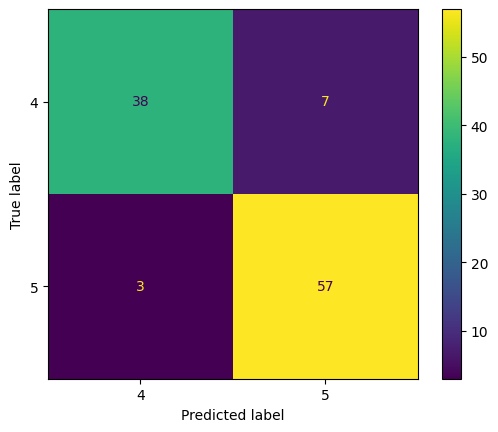

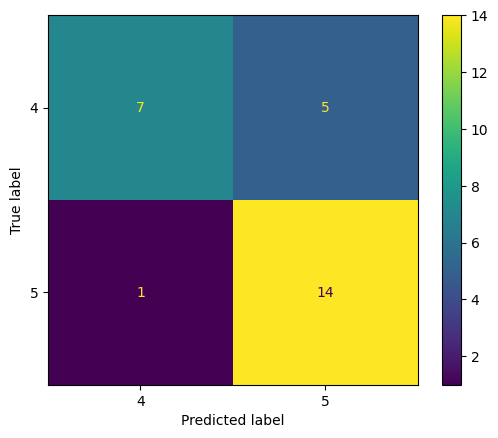

In [33]:
lr = LogisticRegression(penalty='l2', solver='liblinear', C=0.1)

pipe = Pipeline([("pre", z),
                 ("model", lr)])


pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

y_pred_train_prob = pipe.predict_proba(X_train)[:,1]
y_pred_test_prob = pipe.predict_proba(X_test)[:,1]

# Check training accuracy
train_accuracy_stat_lore_lr= accuracy_score(y_pred_train, y_train)
print("Train Accuracy:", train_accuracy_stat_lore_lr)

# Display confusion matrix for training set
ConfusionMatrixDisplay.from_estimator(pipe, X_train, y_train)

# Check test accuracy
test_accuracy_stat_lore_lr = accuracy_score(y_pred_test, y_test)
print("Test Accuracy:", test_accuracy_stat_lore_lr)

# Display confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

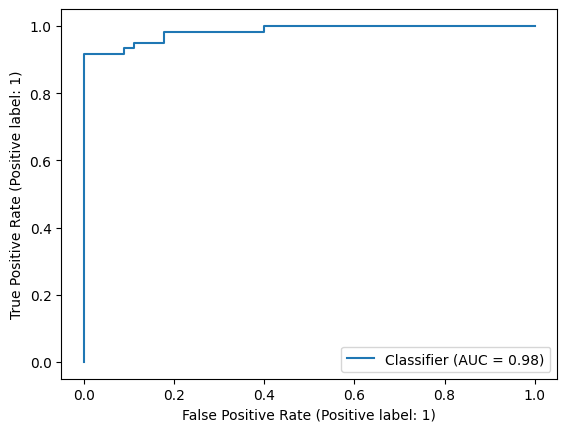

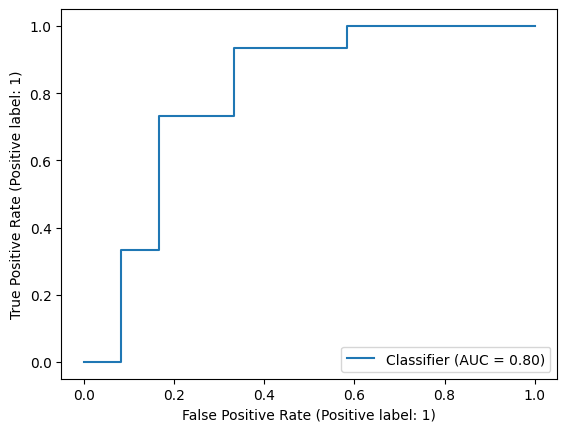

In [34]:
y_train_binary = np.where(y_train == 4, 0, 1)
y_test_binary = np.where(y_test == 4, 0, 1)
# Plotting the ROC curves
display_train = RocCurveDisplay.from_predictions(y_train_binary, y_pred_train_prob)
display_test = RocCurveDisplay.from_predictions(y_test_binary, y_pred_test_prob)

In [35]:
# Classification-specific metrics dictionaries
accuracy = {"train": [], "test": []}
precision = {"train": [], "test": []}
recall = {"train": [], "test": []}
f1 = {"train": [], "test": []}
conf_matrix = {"train": [], "test": []}

kf = KFold(5)

# Loop Over Folds
for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]

    # fit
    pipe.fit(X_train, y_train)

    # predict
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    # assess
    accuracy["train"].append(accuracy_score(y_train, y_pred_train))
    accuracy["test"].append(accuracy_score(y_test, y_pred_test))

    precision["train"].append(precision_score(y_train, y_pred_train, average='binary', pos_label=4))
    precision["test"].append(precision_score(y_test, y_pred_test, average='binary', pos_label=4))

    # Specify pos_label explicitly
    recall["train"].append(recall_score(y_train, y_pred_train, pos_label=4))
    recall["test"].append(recall_score(y_test, y_pred_test, pos_label=4))

    f1["train"].append(f1_score(y_train, y_pred_train, pos_label=4))
    f1["test"].append(f1_score(y_test, y_pred_test, pos_label=4))

    conf_matrix["train"].append(confusion_matrix(y_train, y_pred_train))
    conf_matrix["test"].append(confusion_matrix(y_test, y_pred_test))

# Print out the Classification Performance Evaluations
print("Train Accuracy:", accuracy["train"])
print("Test Accuracy :", accuracy["test"])
print("Train Accuracy Mean:", np.mean(accuracy["train"]))
print("Test Accuracy Mean :", np.mean(accuracy["test"]))

print("Train Precision:", precision["train"])
print("Test Precision :", precision["test"])
print("Train Precision Mean:", np.mean(precision["train"]))
print("Test Precision Mean :", np.mean(precision["test"]))

print("Train Recall:", recall["train"])
print("Test Recall :", recall["test"])
print("Train Recall Mean:", np.mean(recall["train"]))
print("Test Recall Mean :", np.mean(recall["test"]))

print("Train F1 Score:", f1["train"])
print("Test F1 Score :", f1["test"])
print("Train F1 Score Mean:", np.mean(f1["train"]))
print("Test F1 Score Mean :", np.mean(f1["test"]))


Train Accuracy: [0.9047619047619048, 0.9047619047619048, 0.9150943396226415, 0.8867924528301887, 0.9528301886792453]
Test Accuracy : [0.8518518518518519, 0.6296296296296297, 0.5769230769230769, 0.9230769230769231, 0.7307692307692307]
Train Accuracy Mean: 0.9128481581311771
Test Accuracy Mean : 0.7424501424501425
Train Precision: [0.9230769230769231, 0.9459459459459459, 0.9347826086956522, 0.8863636363636364, 0.9772727272727273]
Test Precision : [0.9166666666666666, 0.8333333333333334, 0.4, 1.0, 0.6363636363636364]
Train Precision Mean: 0.9334883682709769
Test Precision Mean : 0.7572727272727272
Train Recall: [0.8372093023255814, 0.813953488372093, 0.8775510204081632, 0.8478260869565217, 0.9148936170212766]
Test Recall : [0.7857142857142857, 0.35714285714285715, 0.75, 0.8181818181818182, 0.7]
Train Recall Mean: 0.8582867030167274
Test Recall Mean : 0.6822077922077922
Train F1 Score: [0.878048780487805, 0.875, 0.9052631578947369, 0.8666666666666666, 0.945054945054945]
Test F1 Score : [0.

#### **Random Forest Classifier**

Train Accuracy: 0.9811320754716981
Test Accuracy: 0.7307692307692307


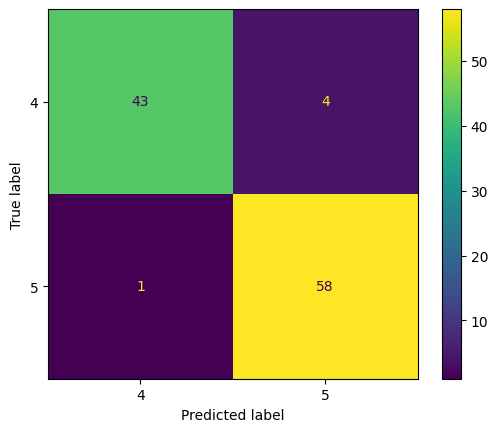

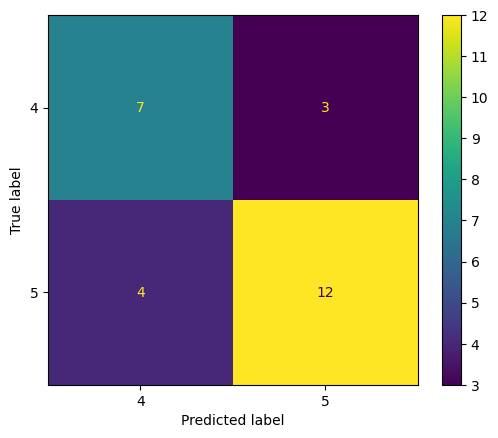

In [36]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, max_depth=9, min_samples_split=20, min_samples_leaf=2, max_features='sqrt', random_state=42)

# Create Pipeline
pipe_cat = Pipeline([
    ("z", z),
    ("tree", rf)
])

# fit
pipe_cat.fit(X_train, y_train)

# predict
y_pred_train = pipe_cat.predict(X_train)
y_pred_test = pipe_cat.predict(X_test)

y_pred_train_prob = pipe_cat.predict_proba(X_train)[:,1]
y_pred_test_prob = pipe_cat.predict_proba(X_test)[:,1]

# Check training accuracy
train_accuracy_stat_lore_rf= accuracy_score(y_pred_train, y_train)
print("Train Accuracy:", train_accuracy_stat_lore_rf)

# Display confusion matrix for training set
ConfusionMatrixDisplay.from_estimator(pipe, X_train, y_train)

# Check test accuracy
test_accuracy_stat_lore_rf = accuracy_score(y_pred_test, y_test)
print("Test Accuracy:", test_accuracy_stat_lore_rf)

# Display confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

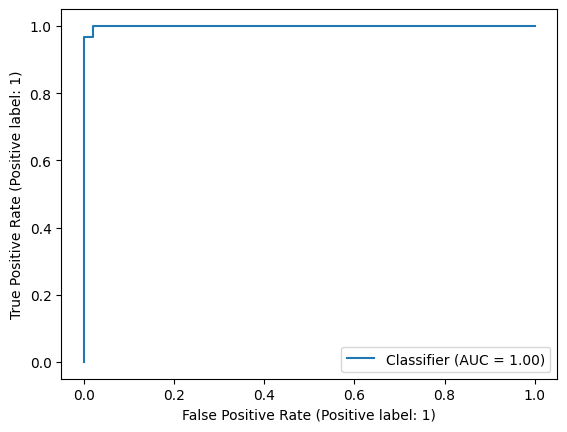

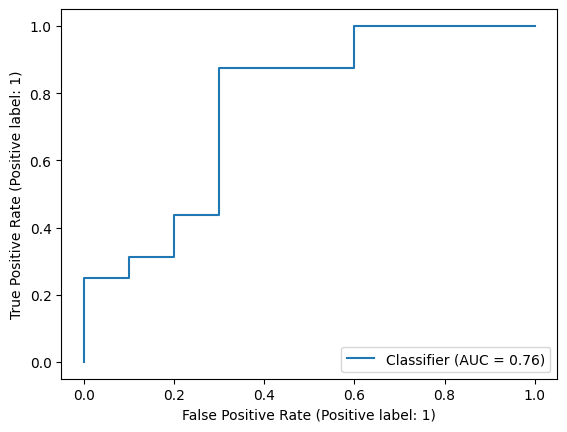

In [37]:
y_train_binary = np.where(y_train == 4, 0, 1)
y_test_binary = np.where(y_test == 4, 0, 1)
# Plotting the ROC curves
display_train = RocCurveDisplay.from_predictions(y_train_binary, y_pred_train_prob)
display_test = RocCurveDisplay.from_predictions(y_test_binary, y_pred_test_prob)

In [38]:
# Perform cross-validation
cross_val_scores = cross_val_score(pipe_cat, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.95454545 0.76190476 0.76190476 0.85714286 0.52380952]
Mean Cross-Validation Score: 0.7718614718614718


#### Hyperparameter Tuning
* Random Search CV - Random Forest Classifier
* Recommend the number of estimators to use, max depth of tree, and the random state

In [39]:
# Random Search CV
param_dist = {
    'tree__n_estimators': [10, 15, 24, 25, 50, 100, 150],
    'tree__max_depth': [3, 5, 7, 9],
    'tree__min_samples_split' : [2, 5, 7, 10, 15, 20],
    'tree__min_samples_leaf' : [2, 5, 7, 10, 15]
}

# use grid search to find best parameters
grid = RandomizedSearchCV(pipe_cat, param_distributions=param_dist, cv = 5, refit = True)

grid.fit(X_train, y_train)

print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__n_estimators"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__max_depth"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__min_samples_split"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__min_samples_leaf"])

RandomizedSearchCV chose:  24
RandomizedSearchCV chose:  5
RandomizedSearchCV chose:  10
RandomizedSearchCV chose:  2


#### **Gradient Boosting Classifier**

Train Accuracy: 0.9811320754716981
Test Accuracy: 0.8846153846153846


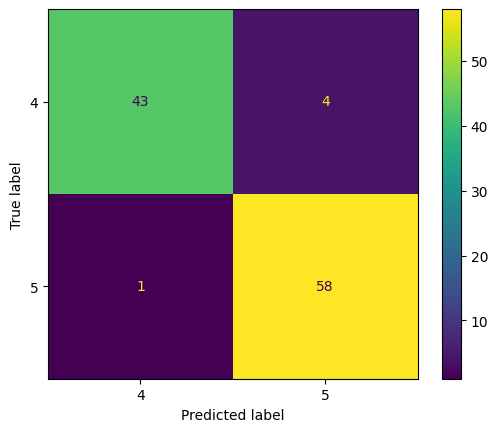

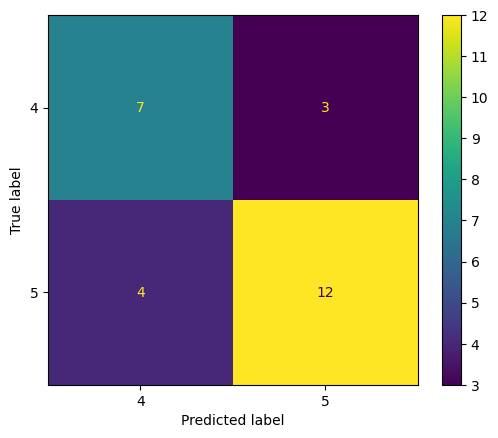

In [40]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=50, max_depth=9, min_samples_split=15, max_leaf_nodes=5, learning_rate=0.17, random_state=1234, n_iter_no_change=5, tol=0.01)

# Create Pipeline
gp_pipe = Pipeline([
    ("z", z),
    ("tree", gb)
])

# fit
gp_pipe.fit(X_train, y_train)

# predict
y_pred_train = gp_pipe.predict(X_train)
y_pred_test = gp_pipe.predict(X_test)

y_pred_train_prob = gp_pipe.predict_proba(X_train)[:,1]
y_pred_test_prob = gp_pipe.predict_proba(X_test)[:,1]

# Check training accuracy
train_accuracy_stat_lore_gb= accuracy_score(y_pred_train, y_train)
print("Train Accuracy:", train_accuracy_stat_lore_gb)

# Display confusion matrix for training set
ConfusionMatrixDisplay.from_estimator(pipe, X_train, y_train)

# Check test accuracy
test_accuracy_stat_lore_gb = accuracy_score(y_pred_test, y_test)
print("Test Accuracy:", test_accuracy_stat_lore_gb)

# Display confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

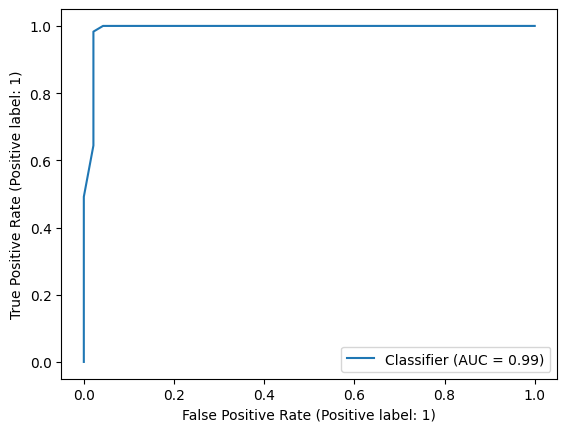

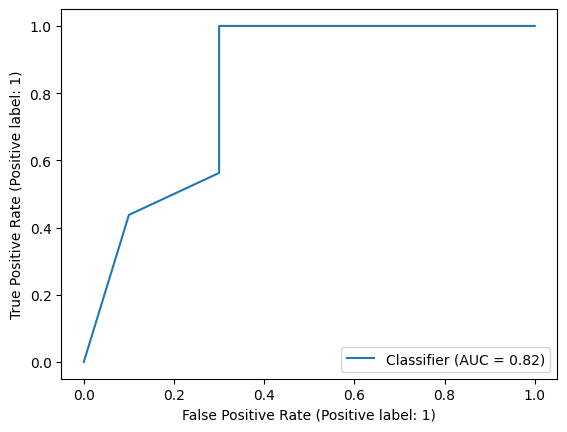

In [41]:
y_train_binary = np.where(y_train == 4, 0, 1)
y_test_binary = np.where(y_test == 4, 0, 1)
# Plotting the ROC curves
display_train = RocCurveDisplay.from_predictions(y_train_binary, y_pred_train_prob)
display_test = RocCurveDisplay.from_predictions(y_test_binary, y_pred_test_prob)

In [42]:
# Define the hyperparameter grid
param_dist = {
    'tree__n_estimators': [25, 50, 100, 150],
    'tree__max_depth': [3, 5, 7, 9],
    'tree__min_samples_split': [2, 3, 4, 5, 10, 15],
    'tree__max_leaf_nodes': [2, 5, 10, 20, 50, 100],
    'tree__learning_rate': loguniform(0.01, 1),
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    gp_pipe,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'tree__learning_rate': 0.8706020878304853, 'tree__max_depth': 9, 'tree__max_leaf_nodes': 100, 'tree__min_samples_split': 15, 'tree__n_estimators': 50}


                    Feature  Importance
0  ascension_Cryo DMG Bonus    0.002644
1           zodiac_sign_Leo    0.003789
2  elemental_power_Physical    0.005190
3          region_Mondstadt    0.005959
4      weapon_type_Claymore    0.017275
5   ascension_Geo DMG Bonus    0.023380
6       zodiac_sign_Scorpio    0.109197
7    elemental_power_Dendro    0.110512
8      weapon_type_Catalyst    0.340050
9           weapon_type_Bow    0.375505


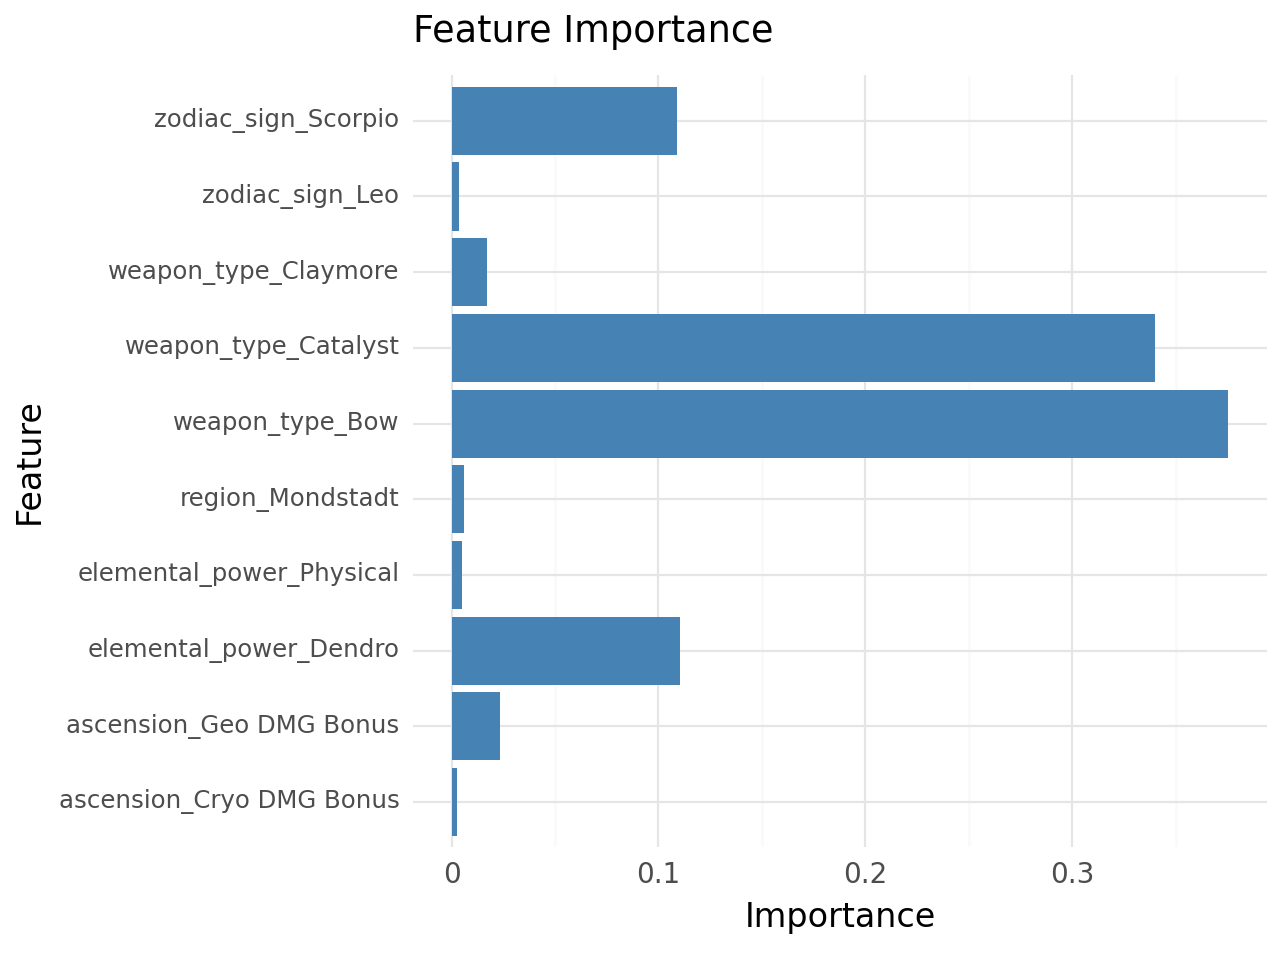

<Figure Size: (640 x 480)>

In [43]:
# Fit the pipeline on the entire dataset
gp_pipe.fit(X, y)

# Access the Gradient Boosting Regressor model from the pipeline
gb = gp_pipe.named_steps['tree']

# Access the preprocessor from the pipeline
preprocessor = pipe.named_steps['pre']

# Get the column transformer's output feature names after one-hot encoding
encoded_feature_names = preprocessor.named_transformers_['pipeline'].named_steps['onehot'].get_feature_names_out(input_features=cat)

# Create a DataFrame with feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': encoded_feature_names.tolist() + cont,
                                       'Importance': gb.feature_importances_})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Take only the top 10 features
top_features = feature_importance_df.head(10)
top_features = top_features.sort_values(by='Importance', ascending=True)
top_features = top_features.reset_index(drop=True)
print(top_features)

(ggplot(top_features, aes(x='Feature', y='Importance'))
     + geom_bar(stat='identity', fill='steelblue')
     + theme_minimal()
     + theme(axis_text_x=element_text(size=10),  # Adjust text size on the x-axis
             axis_title=element_text(size=12))   # Adjust axis title size
     + labs(x='Feature', y='Importance')
     + ggtitle('Feature Importance')
     + coord_flip())

### **Graphs & Plots**

#### Lore Model Performance Comparison

/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 5 values. 6 were requested from it.
/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 5 values. 6 were requested from it.


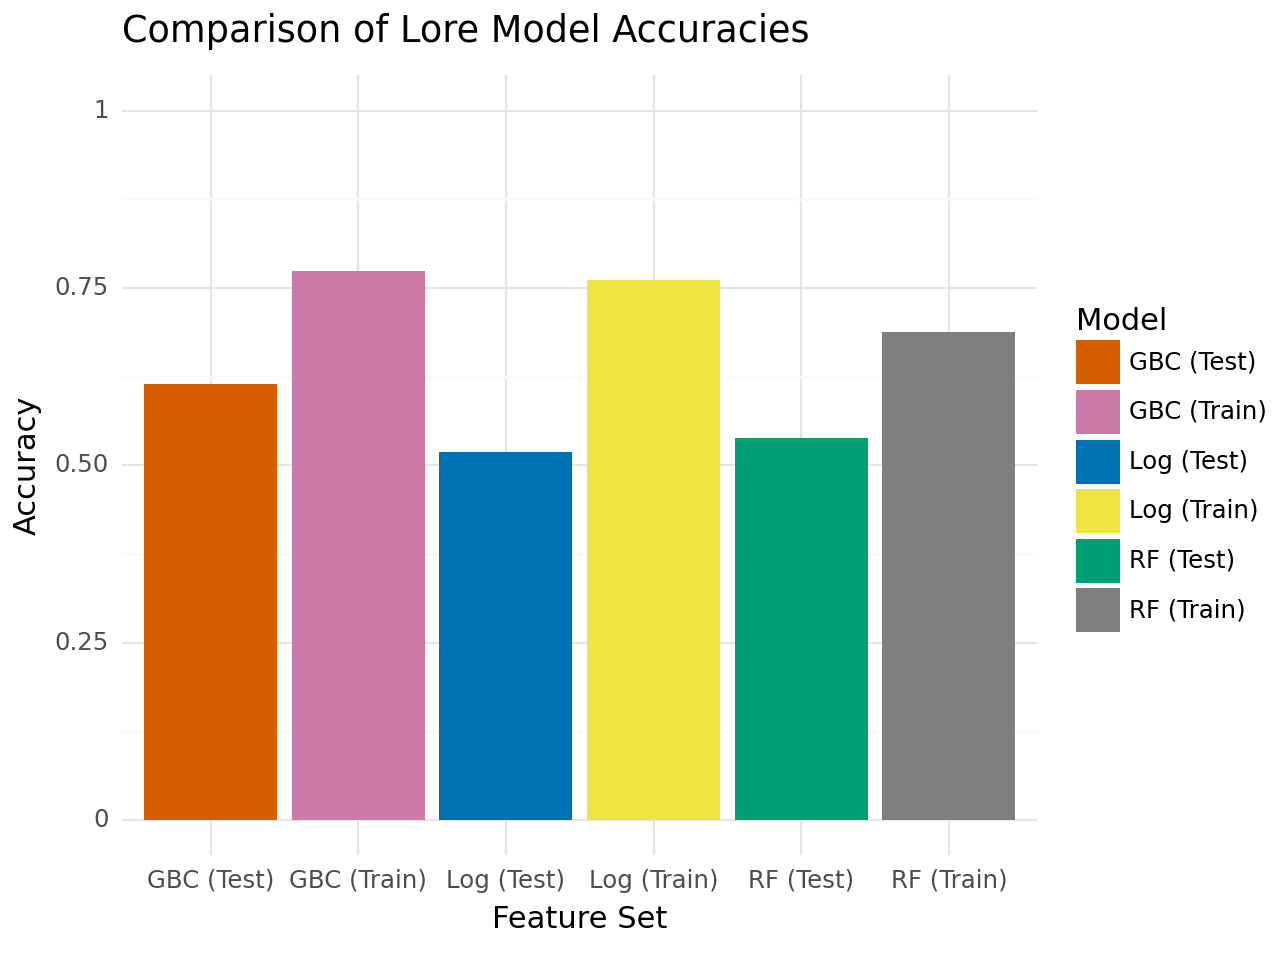

In [44]:
accuracies = [train_accuracy_lore_log, test_accuracy_lore_log, train_accuracy_lore_rf, test_accuracy_lore_rf, train_accuracy_lore_gbc, test_accuracy_lore_gbc]

df = pd.DataFrame({
    'Model': ['Log (Train)', 'Log (Test)', 'RF (Train)', 'RF (Test)', 'GBC (Train)', 'GBC (Test)'],
    'Accuracy': accuracies,
})

(ggplot(df, aes(x='Model', y='Accuracy', fill='Model')) +
 geom_bar(stat='identity', position='dodge') +
 scale_fill_manual(["#d55e00", "#cc79a7", "#0072b2","#f0e442","#009e73"]) +  # Use the color palette
 ylim(0, 1) +
 labs(x='Feature Set', y='Accuracy', title='Comparison of Lore Model Accuracies') +
 theme_minimal()).draw()


#### Stat Model Performance Comparison

/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 5 values. 6 were requested from it.
/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 5 values. 6 were requested from it.


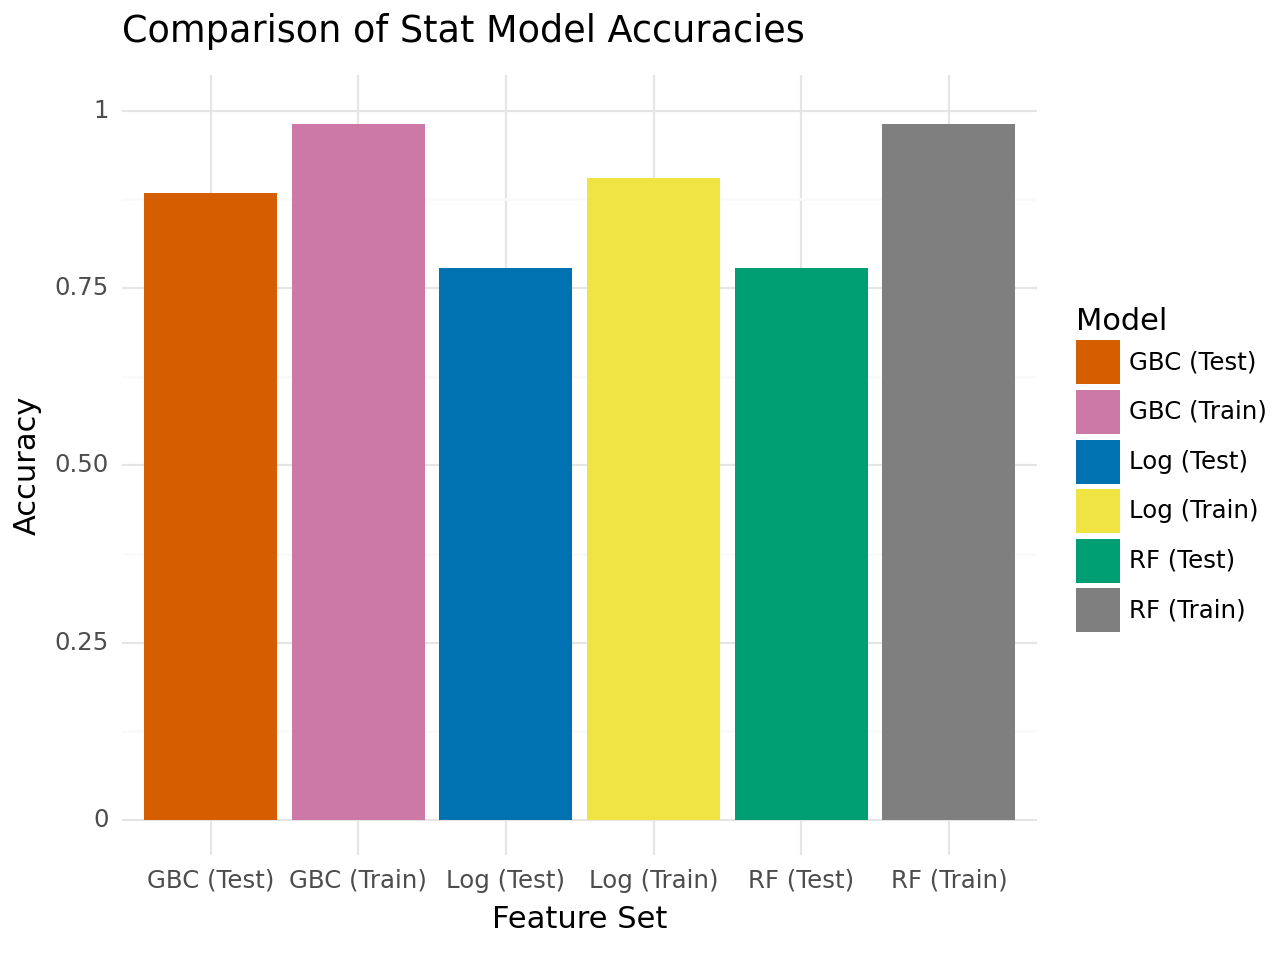

In [45]:
accuracies = [train_accuracy_stat_lore_lr, test_accuracy_stat_lore_lr, train_accuracy_stat_lore_rf, test_accuracy_stat_lore_lr, train_accuracy_stat_lore_gb, test_accuracy_stat_lore_gb]

df = pd.DataFrame({
    'Model': ['Log (Train)', 'Log (Test)', 'RF (Train)', 'RF (Test)', 'GBC (Train)', 'GBC (Test)'],
    'Accuracy': accuracies,
})

(ggplot(df, aes(x='Model', y='Accuracy', fill='Model')) +
 geom_bar(stat='identity', position='dodge') +
 scale_fill_manual(["#d55e00", "#cc79a7", "#0072b2","#f0e442","#009e73"]) +  # Use the color palette
 ylim(0, 1) +
 labs(x='Feature Set', y='Accuracy', title='Comparison of Stat Model Accuracies') +
 theme_minimal()).draw()

#### ALL Model Performance Comparison

/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 5 values. 6 were requested from it.
/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 5 values. 6 were requested from it.


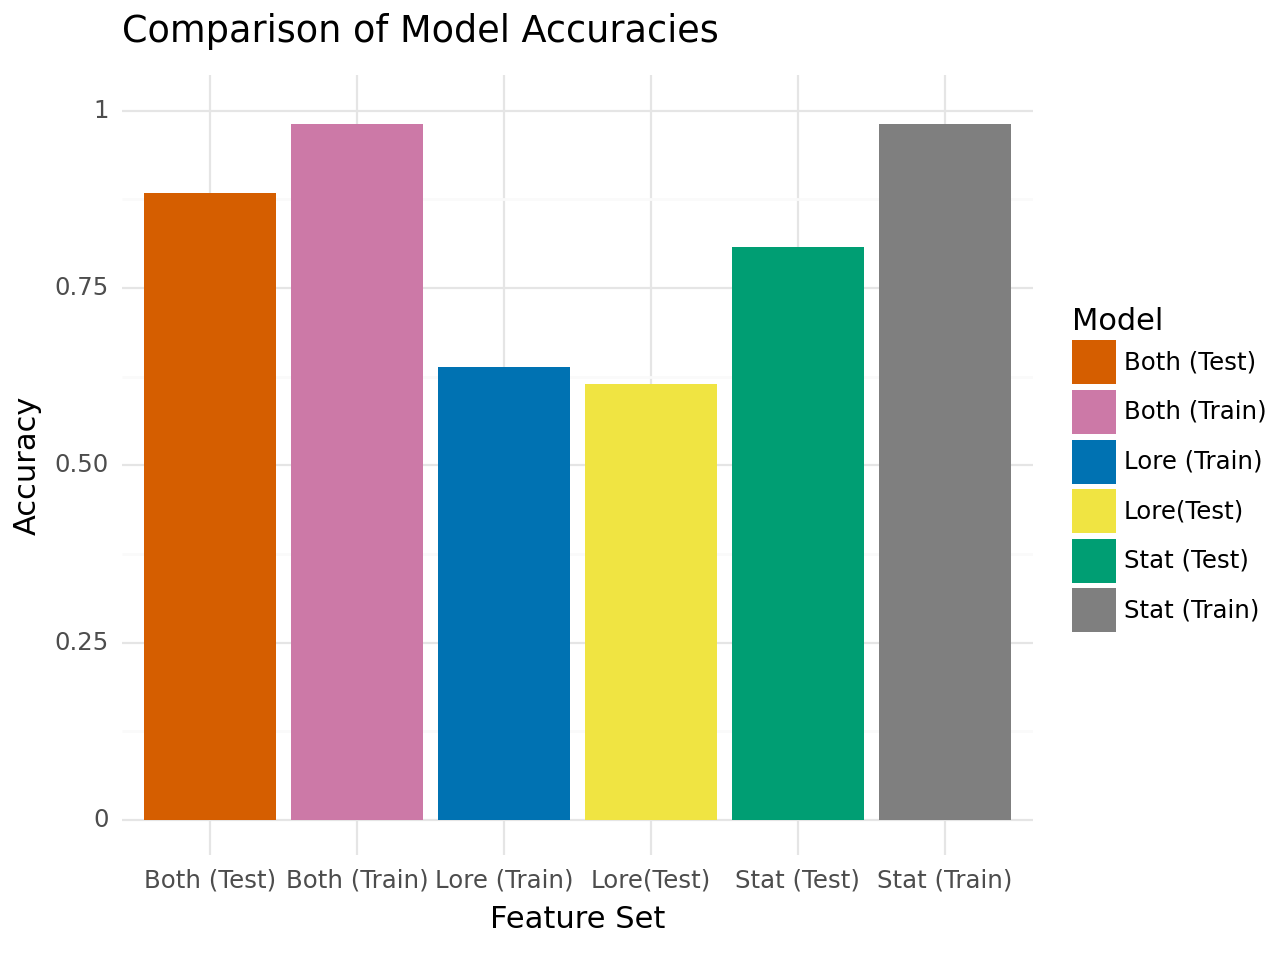

In [70]:
# Accuracy Scores of Each Model
accuracies = [train_accuracy_lore_gbc, test_accuracy_lore_gbc, train_accuracy_stat_gb, test_accuracy_stat_gb, train_accuracy_stat_lore_gb, test_accuracy_stat_lore_gb]

df = pd.DataFrame({
    'Model': ['Lore (Train)', 'Lore(Test)', 'Stat (Train)', 'Stat (Test)', 'Both (Train)', 'Both (Test)'],
    'Accuracy': accuracies,
})


(ggplot(df, aes(x='Model', y='Accuracy', fill='Model')) +
 geom_bar(stat='identity', position='dodge') +
 scale_fill_manual(["#d55e00", "#cc79a7", "#0072b2","#f0e442","#009e73"]) +  # Use the color palette
 ylim(0, 1) +
 labs(x='Feature Set', y='Accuracy', title='Comparison of Model Accuracies') +
 theme_minimal()).draw()

In [71]:
df.head(6)

,Model,Accuracy
0,Lore (Train),0.638095
1,Lore(Test),0.615385
2,Stat (Train),0.981132
3,Stat (Test),0.807692
4,Both (Train),0.981132
5,Both (Test),0.884615


#### Training Model Performance Comparison

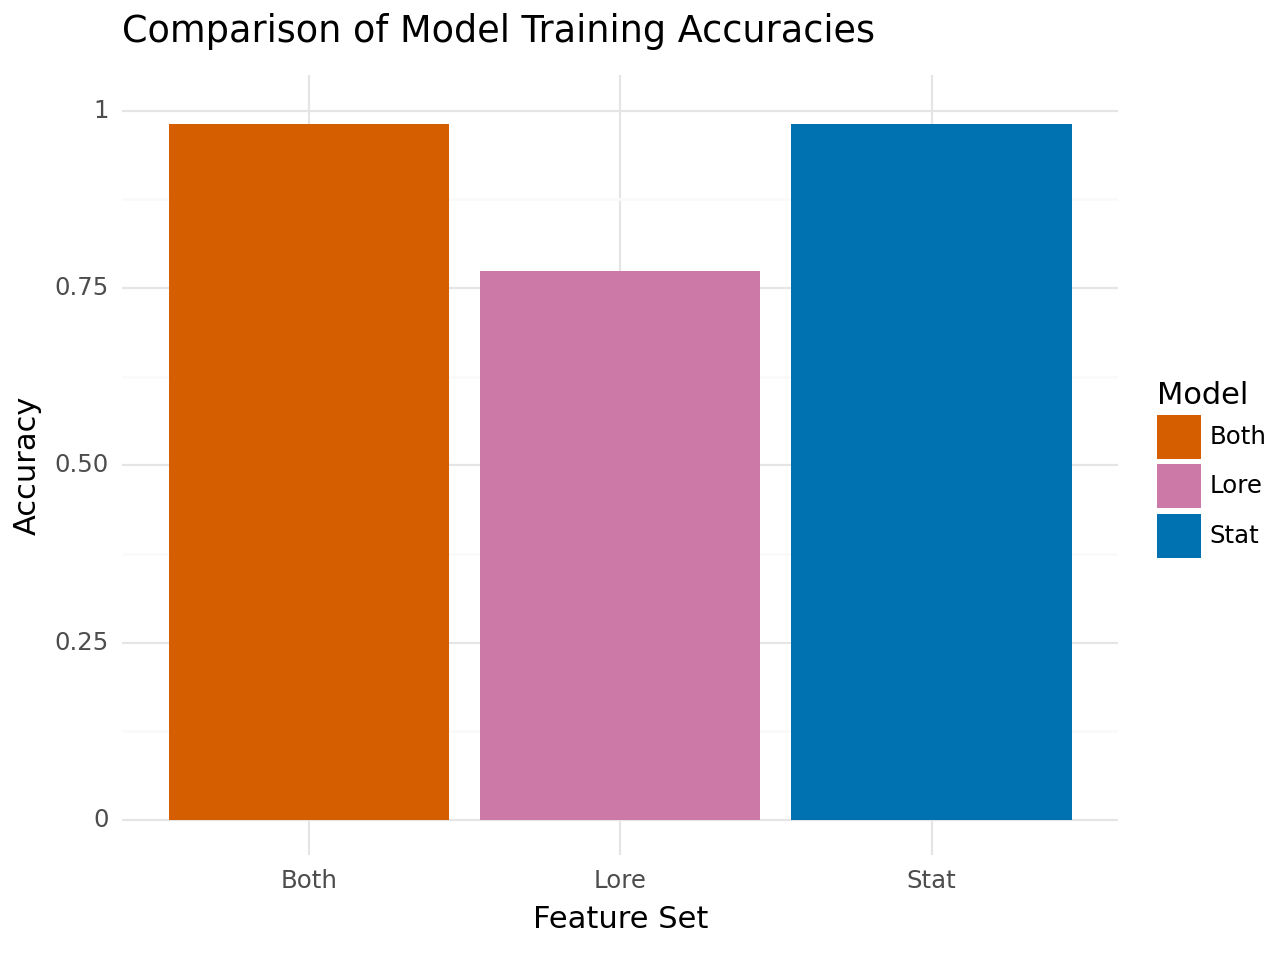

<Figure Size: (640 x 480)>

In [47]:
accuracies = [train_accuracy_lore_gbc, train_accuracy_stat_gb, train_accuracy_stat_lore_gb]

data = {'Model': ['Lore', 'Stat', 'Both'], 'Accuracy': [train_accuracy_lore_gbc, train_accuracy_stat_gb, train_accuracy_stat_lore_gb]}

df = pd.DataFrame(data)


# Create a bar plot using ggplot
(ggplot(df, aes(x='Model', y='Accuracy', fill = 'Model')) +
 geom_bar(stat='identity', position='dodge') +
 scale_fill_manual(["#d55e00", "#cc79a7", "#0072b2","#f0e442","#009e73"]) +
 ylim(0, 1) +
 labs(x='Feature Set', y='Accuracy', title='Comparison of Model Training Accuracies') +
 theme_minimal())


#### Testing Model Performance Comparison

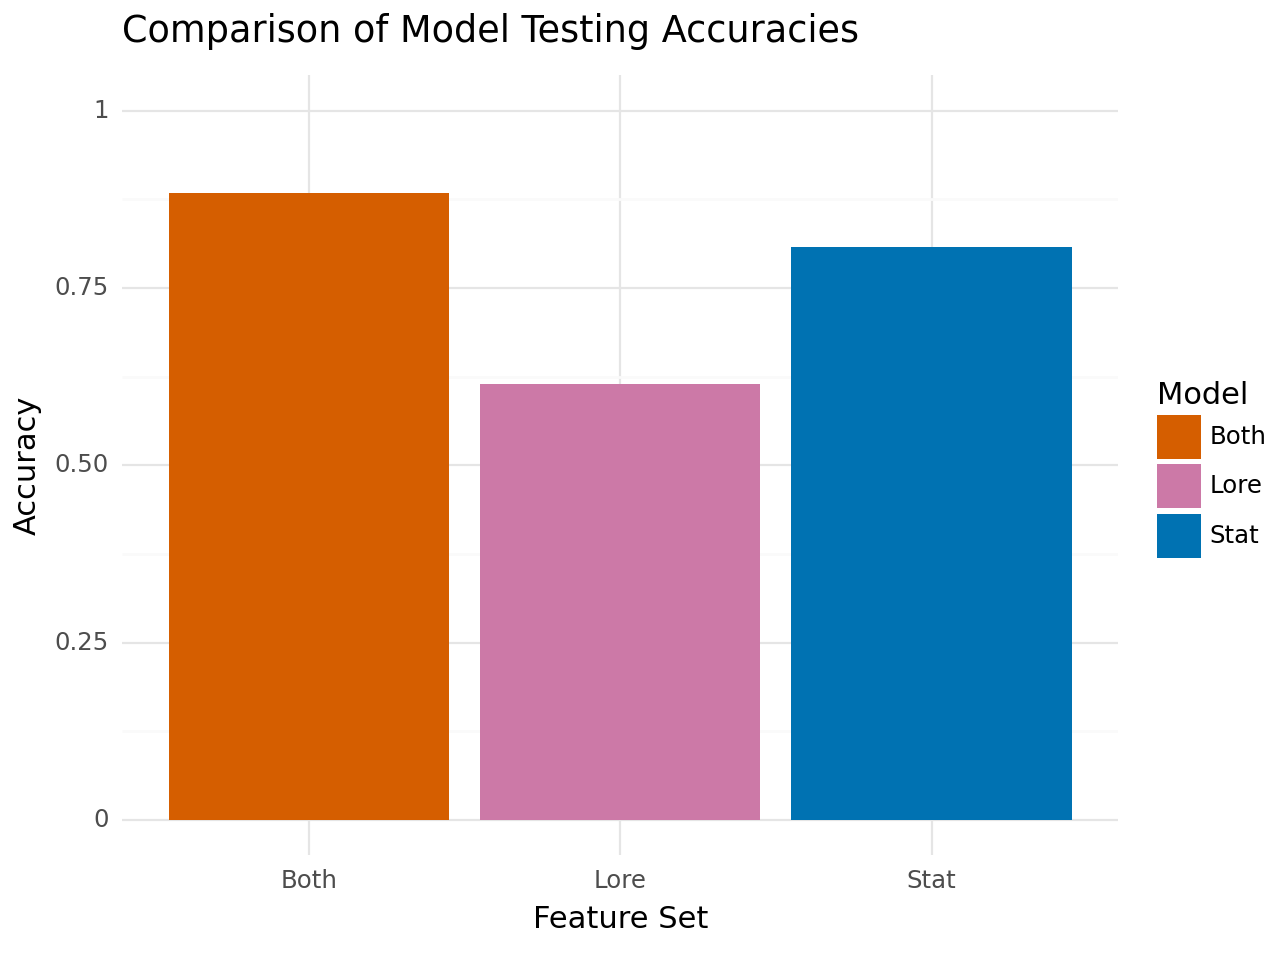

<Figure Size: (640 x 480)>

In [48]:
accuracies = [test_accuracy_lore_gbc, test_accuracy_stat_gb, test_accuracy_stat_lore_gb]


data = {'Model': ['Lore', 'Stat', 'Both'], 'Accuracy': [test_accuracy_lore_gbc, test_accuracy_stat_gb, test_accuracy_stat_lore_gb]}

df = pd.DataFrame(data)

# Create a bar plot using ggplot
(ggplot(df, aes(x='Model', y='Accuracy', fill='Model')) +
 geom_bar(stat='identity', position='dodge') +
 scale_fill_manual(["#d55e00", "#cc79a7", "#0072b2","#f0e442","#009e73"]) +
 ylim(0, 1) +
 labs(x='Feature Set', y='Accuracy', title='Comparison of Model Testing Accuracies') +
 theme_minimal())



## **Q4**
Can we predict the weapon's base ATK based on their weapon type, secondary stat, rarity, obtain method, and maxed secondary stats? Which of the variables has the strongest relationship with the base ATK?

The data will be analyzed by one of the three regression models, and the model with the best performance metrics will be chosen.

### **Data Preprocessing**

In [49]:
predictors = ['weapon_type', 'secondary_stat', 'rarity', 'explore','percentage_stat', 'maxed_secondary_stat']

cont = ['maxed_secondary_stat']
cat = ['weapon_type', 'secondary_stat', 'rarity', 'explore','percentage_stat']

In [50]:
X = weapon[predictors]
y = weapon["base_atk"]

# Check if there is multicollinearity in the predictors
for col1 in X.columns:
    for col2 in X.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(X[col1], X[col2])
            _, p_value, _, _ = chi2_contingency(contingency_table)
            if p_value < 0.05:
                print(f"Chi-square test is significant for {col1} and {col2}.")

Chi-square test is significant for secondary_stat and rarity.
Chi-square test is significant for secondary_stat and percentage_stat.
Chi-square test is significant for secondary_stat and maxed_secondary_stat.
Chi-square test is significant for rarity and secondary_stat.
Chi-square test is significant for rarity and explore.
Chi-square test is significant for rarity and maxed_secondary_stat.
Chi-square test is significant for explore and rarity.
Chi-square test is significant for explore and maxed_secondary_stat.
Chi-square test is significant for percentage_stat and secondary_stat.
Chi-square test is significant for percentage_stat and maxed_secondary_stat.
Chi-square test is significant for maxed_secondary_stat and secondary_stat.
Chi-square test is significant for maxed_secondary_stat and rarity.
Chi-square test is significant for maxed_secondary_stat and explore.
Chi-square test is significant for maxed_secondary_stat and percentage_stat.


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

categorical_pipe = Pipeline([('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

z = make_column_transformer((StandardScaler(), cont),
                            (categorical_pipe, cat),
                            remainder = "passthrough")

#### **Linear Regression**

In [52]:
lr = LassoCV()

pipe = Pipeline([("pre", z),
                 ("lasso", lr)])

# fit
pipe.fit(X_train,y_train)

# predict
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)


# assess
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train MAE : ", mean_absolute_error(y_train,y_pred_train))
print("Train MAPE: ", mean_squared_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))

print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test MAE  : ", mean_absolute_error(y_test,y_pred_test))
print("Test MAPE : ", mean_squared_error(y_test,y_pred_test))
print("Test R2   : ", r2_score(y_test,y_pred_test))

Train MSE :  646.493336266627
Train MAE :  20.044981175381515
Train MAPE:  646.493336266627
Train R2  :  0.8966686930123781
Test MSE  :  1067.3670558222893
Test MAE  :  25.2694436566474
Test MAPE :  1067.3670558222893
Test R2   :  0.7999052427923693


In [53]:
# validation
kf = KFold(5)

mse = {"train": [], "test": []}
mae = {"train": [], "test": []}


for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]

    # fit
    pipe.fit(X_train,y_train)

    # predict
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    # assess
    mse["train"].append(mean_squared_error(y_train,y_pred_train))
    mse["test"].append(mean_squared_error(y_test,y_pred_test))

    mae["train"].append(mean_absolute_error(y_train,y_pred_train))
    mae["test"].append(mean_absolute_error(y_test,y_pred_test))

print("Train MSEs:", mse["train"])
print("Test MSEs :", mse["test"])
print("Train MSE :", np.mean(mse["train"]))
print("Test MSE  :", np.mean(mse["test"]))

Train MSEs: [650.2335297616144, 742.935908752043, 698.6995689035015, 702.8502387559734, 710.2118397770223]
Test MSEs : [1072.2609421459986, 862.4178651039567, 748.9825482014287, 1020.509158101098, 748.328533861414]
Train MSE : 700.986217190031
Test MSE  : 890.4998094827791


In [54]:
pipe.named_steps["lasso"].alpha_
pipe.named_steps["lasso"].coef_

array([-7.24761253e+01, -3.46774188e+00,  1.41050366e+00,  0.00000000e+00,
        3.40031296e+00, -8.73004582e+00,  0.00000000e+00,  5.63588140e+00,
       -4.51070050e+01, -0.00000000e+00,  1.82500447e+02, -6.32147270e-01,
       -1.75557428e+01,  1.30986198e+01, -1.28097067e+02,  0.00000000e+00,
        1.21136656e+02,  0.00000000e+00, -0.00000000e+00,  6.66804372e+00,
       -4.93633856e-15])

#### **Random Forest Regressor**

In [55]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=24, max_depth = 9, min_samples_split= 10, min_samples_leaf=2, max_features='sqrt', random_state=42)

pipe = Pipeline([("pre", z),
                ("tree", rf)])

# model validation
kf = KFold(5)

mse = {"train": [], "test": []}
mae = {"train": [], "test": []}
mape = {"train": [], "test": []}
r2 = {"train": [], "test": []}

for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]

    # fit
    pipe.fit(X_train,y_train)

    # predict
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    # assess
    mse["train"].append(mean_squared_error(y_train,y_pred_train))
    mse["test"].append(mean_squared_error(y_test,y_pred_test))

    mae["train"].append(mean_absolute_error(y_train,y_pred_train))
    mae["test"].append(mean_absolute_error(y_test,y_pred_test))

    mape["train"].append(mean_absolute_percentage_error(y_train,y_pred_train))
    mape["test"].append(mean_absolute_percentage_error(y_test,y_pred_test))

    r2["train"].append(r2_score(y_train,y_pred_train))
    r2["test"].append(r2_score(y_test,y_pred_test))

print("Train MSEs:", mse["train"])
print("Test MSEs :", mse["test"])
print("Train MSE :", np.mean(mse["train"]))
print("Test MSE  :", np.mean(mse["test"]))

print("Train MAEs:", mae["train"])
print("Test MAEs :", mae["test"])
print("Train MAE :", np.mean(mae["train"]))
print("Test MAE  :", np.mean(mae["test"]))

print("Train MAPEs:", mape["train"])
print("Test MAPEs :", mape["test"])
print("Train MAPE :", np.mean(mape["train"]))
print("Test MAPE  :", np.mean(mape["test"]))

print("Train R2s:", r2["train"])
print("Test R2s :", r2["test"])
print("Train R2 :", np.mean(r2["train"]))
print("Test R2  :", np.mean(r2["test"]))

Train MSEs: [1176.084184306638, 1312.1455017551814, 1406.6439435229959, 1186.247422620664, 1281.9470220000458]
Test MSEs : [2456.9698402421864, 1219.8675815822269, 1462.9210957669766, 2465.0532738746447, 1335.243013824659]
Train MSE : 1272.613614841105
Test MSE  : 1788.0109610581385
Train MAEs: [26.207052378338926, 27.623725173141846, 28.411764865006003, 26.736601170278323, 28.03412010294256]
Test MAEs : [40.982698953837996, 28.11096972694462, 29.614776305665462, 40.17753131383408, 24.923543976826895]
Train MAE : 27.40265273794153
Test MAE  : 32.76190405542181
Train MAPEs: [0.05066407248184435, 0.05376402664636337, 0.05527283151274451, 0.05229992805848049, 0.05526231025815178]
Test MAPEs : [0.08298650715280041, 0.056050142874644625, 0.058834144066818, 0.07517745648119223, 0.04684775962699713]
Train MAPE : 0.0534526337915169
Test MAPE  : 0.06397920204049047
Train R2s: [0.7867417764029608, 0.8024994478831404, 0.7748169433737202, 0.7843487960945034, 0.8024665187806018]
Test R2s : [0.70173

#### Hyperparameter Tuning
* Random Search CV - Random Forest Classifier
* Recommend the number of estimators to use, max depth of tree, and the random state

In [56]:
# Random Search CV
param_dist = {
    'tree__n_estimators': [10, 15, 24, 25, 50, 100, 150],
    'tree__max_depth': [3, 5, 7, 9],
    'tree__min_samples_split' : [2, 5, 7, 10, 15, 20],
    'tree__min_samples_leaf' : [2, 5, 7, 10, 15]
}

# use grid search to find best parameters
grid = RandomizedSearchCV(pipe, param_distributions=param_dist, cv = 5, refit = True)

grid.fit(X_train, y_train)

print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__n_estimators"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__max_depth"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__min_samples_split"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__min_samples_leaf"])

RandomizedSearchCV chose:  15
RandomizedSearchCV chose:  9
RandomizedSearchCV chose:  10
RandomizedSearchCV chose:  2


#### **Gradient Boosting Regressor**

In [57]:
# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=50, max_depth=3, min_samples_split=5, max_leaf_nodes=10, learning_rate= 0.3, random_state=1234, n_iter_no_change=5, tol=0.01)

pipe = Pipeline([("pre", z),
                ("tree", gb)])

# model validation
kf = KFold(5)

mse = {"train": [], "test": []}
mae = {"train": [], "test": []}
mape = {"train": [], "test": []}
r2 = {"train": [], "test": []}

for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]

    # fit
    pipe.fit(X_train,y_train)

    # predict
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    # assess
    mse["train"].append(mean_squared_error(y_train,y_pred_train))
    mse["test"].append(mean_squared_error(y_test,y_pred_test))

    mae["train"].append(mean_absolute_error(y_train,y_pred_train))
    mae["test"].append(mean_absolute_error(y_test,y_pred_test))

    mape["train"].append(mean_absolute_percentage_error(y_train,y_pred_train))
    mape["test"].append(mean_absolute_percentage_error(y_test,y_pred_test))

    r2["train"].append(r2_score(y_train,y_pred_train))
    r2["test"].append(r2_score(y_test,y_pred_test))

print("Train MSEs:", mse["train"])
print("Test MSEs :", mse["test"])
print("Train MSE :", np.mean(mse["train"]))
print("Test MSE  :", np.mean(mse["test"]))

print("Train MAEs:", mae["train"])
print("Test MAEs :", mae["test"])
print("Train MAE :", np.mean(mae["train"]))
print("Test MAE  :", np.mean(mae["test"]))

print("Train MAPEs:", mape["train"])
print("Test MAPEs :", mape["test"])
print("Train MAPE :", np.mean(mape["train"]))
print("Test MAPE  :", np.mean(mape["test"]))

print("Train R2s:", r2["train"])
print("Test R2s :", r2["test"])
print("Train R2 :", np.mean(r2["train"]))
print("Test R2  :", np.mean(r2["test"]))

Train MSEs: [137.01885121180098, 59.79163111277253, 64.82028767478667, 55.16572326332136, 31.563453788074444]
Test MSEs : [376.1814915020352, 241.56409003561095, 160.04477493529427, 465.7389522364845, 1312.6948206852862]
Train MSE : 69.6719894101512
Test MSE  : 511.24482587894215
Train MAEs: [4.104302745155788, 3.5650540853862895, 3.677480675237938, 3.066174341523711, 2.320095685345089]
Test MAEs : [12.68831374052973, 8.236455094385914, 7.419834490409774, 11.623513668195505, 17.532458241570673]
Train MAE : 3.3466215065297633
Test MAE  : 11.500115047018319
Train MAPEs: [0.008371425182552577, 0.006934930339257983, 0.007147386250425882, 0.00600012547944558, 0.004317463092699236]
Test MAPEs : [0.024989157743832695, 0.01615210988816347, 0.01599780687643841, 0.023182761793862708, 0.03365770583600801]
Train MAPE : 0.006554266068876251
Test MAPE  : 0.022795908427661056
Train R2s: [0.9751545023743665, 0.9910003272190896, 0.9896232230073476, 0.989971270403462, 0.9951364301339547]
Test R2s : [0.9

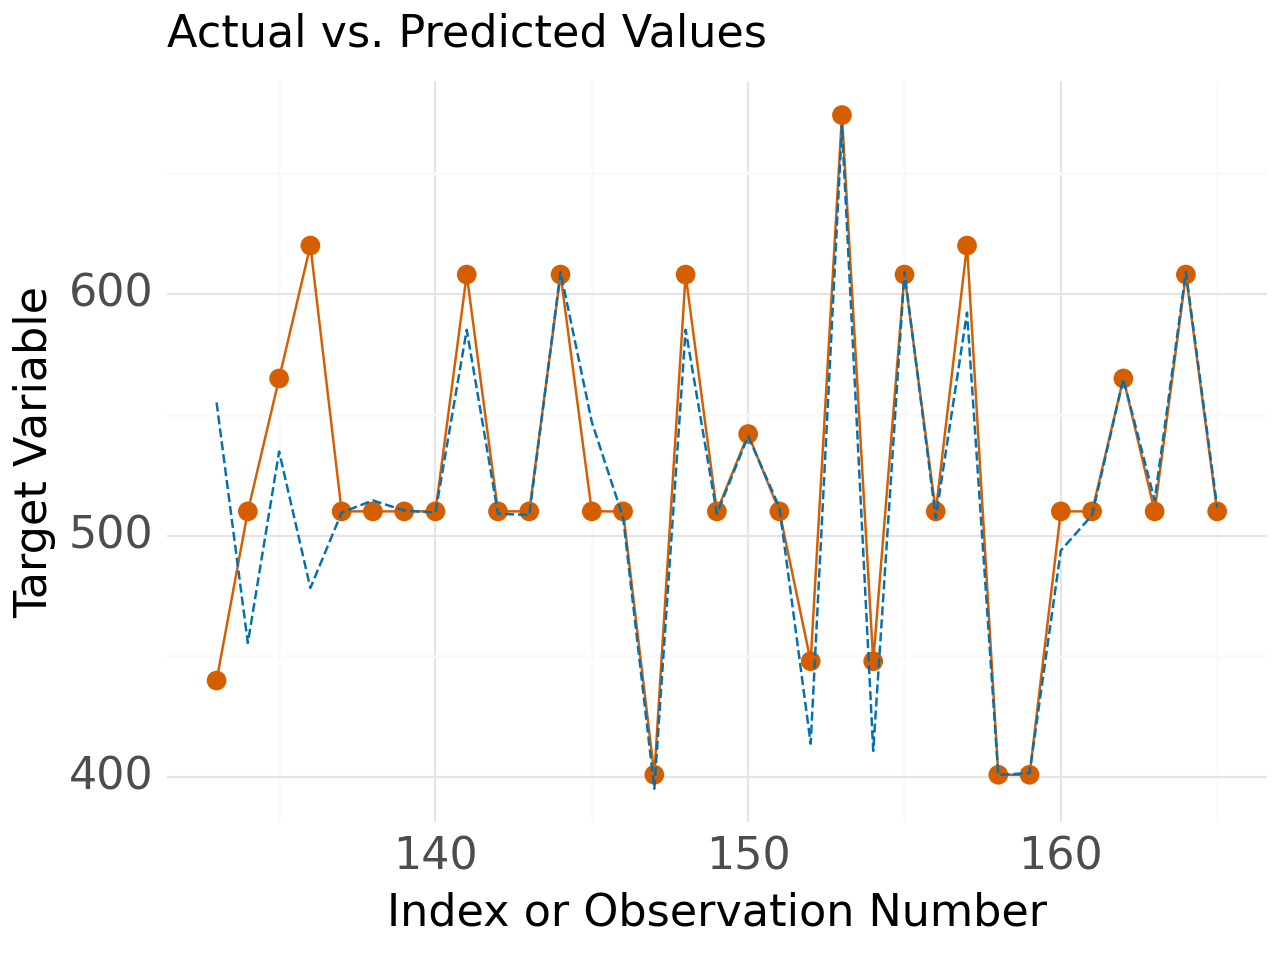

<Figure Size: (640 x 480)>

In [58]:
df = pd.DataFrame({'Index': y_test.index, 'Actual': y_test, 'Predicted': y_pred_test})

(ggplot(df, aes(x='Index'))
     + geom_point(aes(y='Actual'), color="#d55e00", shape='o', size=3)
     + geom_line(aes(y='Actual'), color="#d55e00", linetype='solid')
     + geom_line(aes(y='Predicted'), linetype='dashed', color='#0072b2')
     + theme_minimal()
     + labs(x='Index or Observation Number', y='Target Variable', title='Actual vs. Predicted Values')
     + theme(legend_position='top', legend_title_align='left', text=element_text(size=16))
     + labs(color="Legend")
)

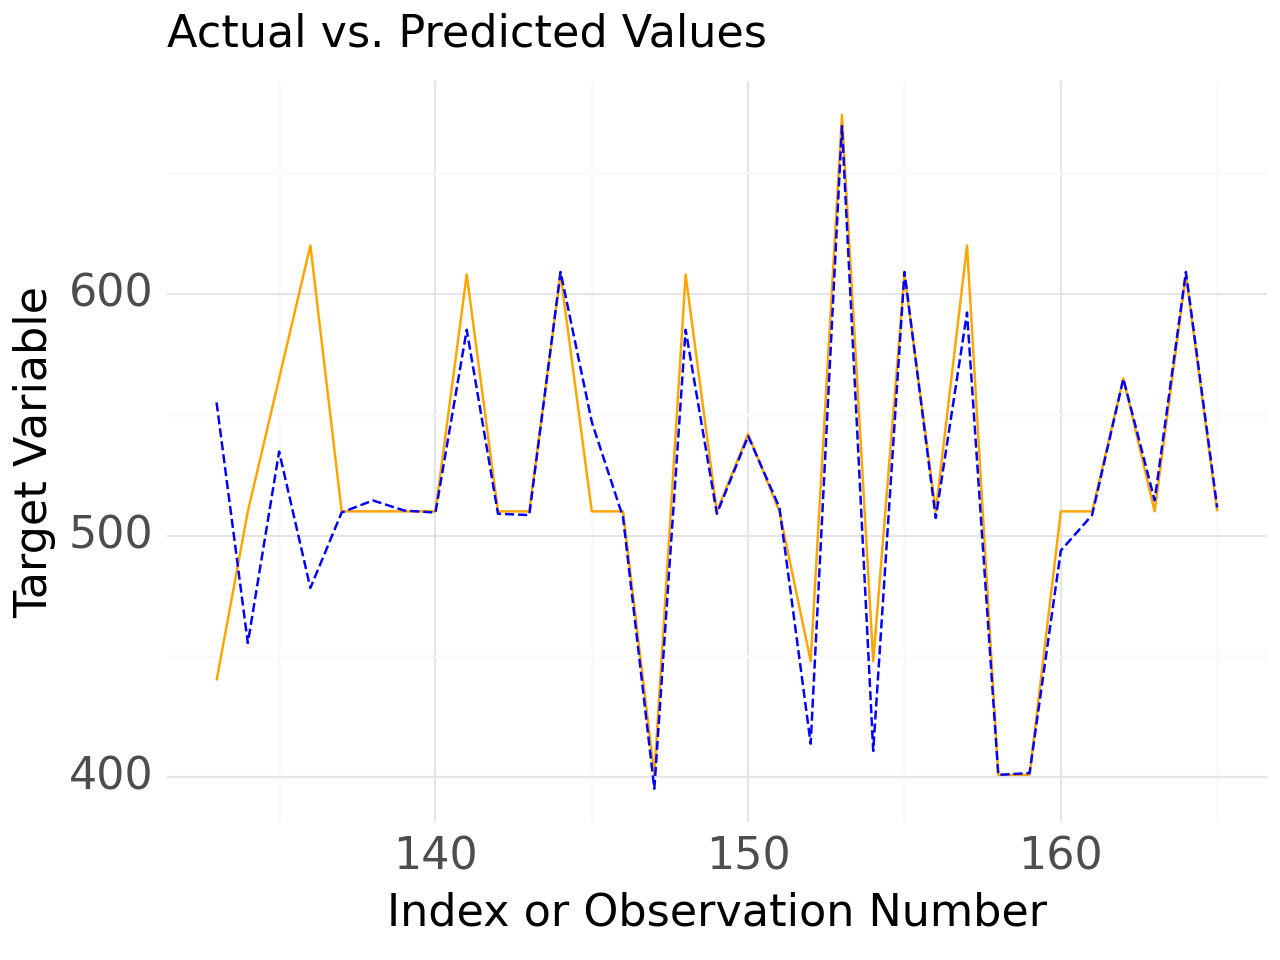

<Figure Size: (640 x 480)>

In [59]:
(ggplot(df, aes(x='Index'))
     + geom_line(aes(y='Actual'), color='orange')
     + geom_line(aes(y='Predicted'), linetype='dashed', color='blue')
     + theme_minimal()
     + labs(x='Index or Observation Number', y='Target Variable', title='Actual vs. Predicted Values')
     + theme(legend_position='top', legend_title_align='left', text=element_text(size=16)))

                              Feature  Importance
14                           rarity_4    0.435948
0                     weapon_type_bow    0.232647
16                          explore_0    0.160298
15                           rarity_5    0.070365
8                  secondary_stat_DEF    0.034896
10     secondary_stat_ENERGY_RECHARGE    0.022625
7            secondary_stat_CRIT_RATE    0.013663
21               maxed_secondary_stat    0.012113
20                percentage_stat_nan    0.004705
11                  secondary_stat_HP    0.004654
5                  secondary_stat_ATK    0.002690
4                   weapon_type_sword    0.001166
17                          explore_1    0.001091
19                percentage_stat_1.0    0.001029
13                           rarity_3    0.000824
2                weapon_type_claymore    0.000538
18                percentage_stat_0.0    0.000453
1                weapon_type_catalyst    0.000199
12  secondary_stat_PHYSICAL_DMG_BONUS    0.000056


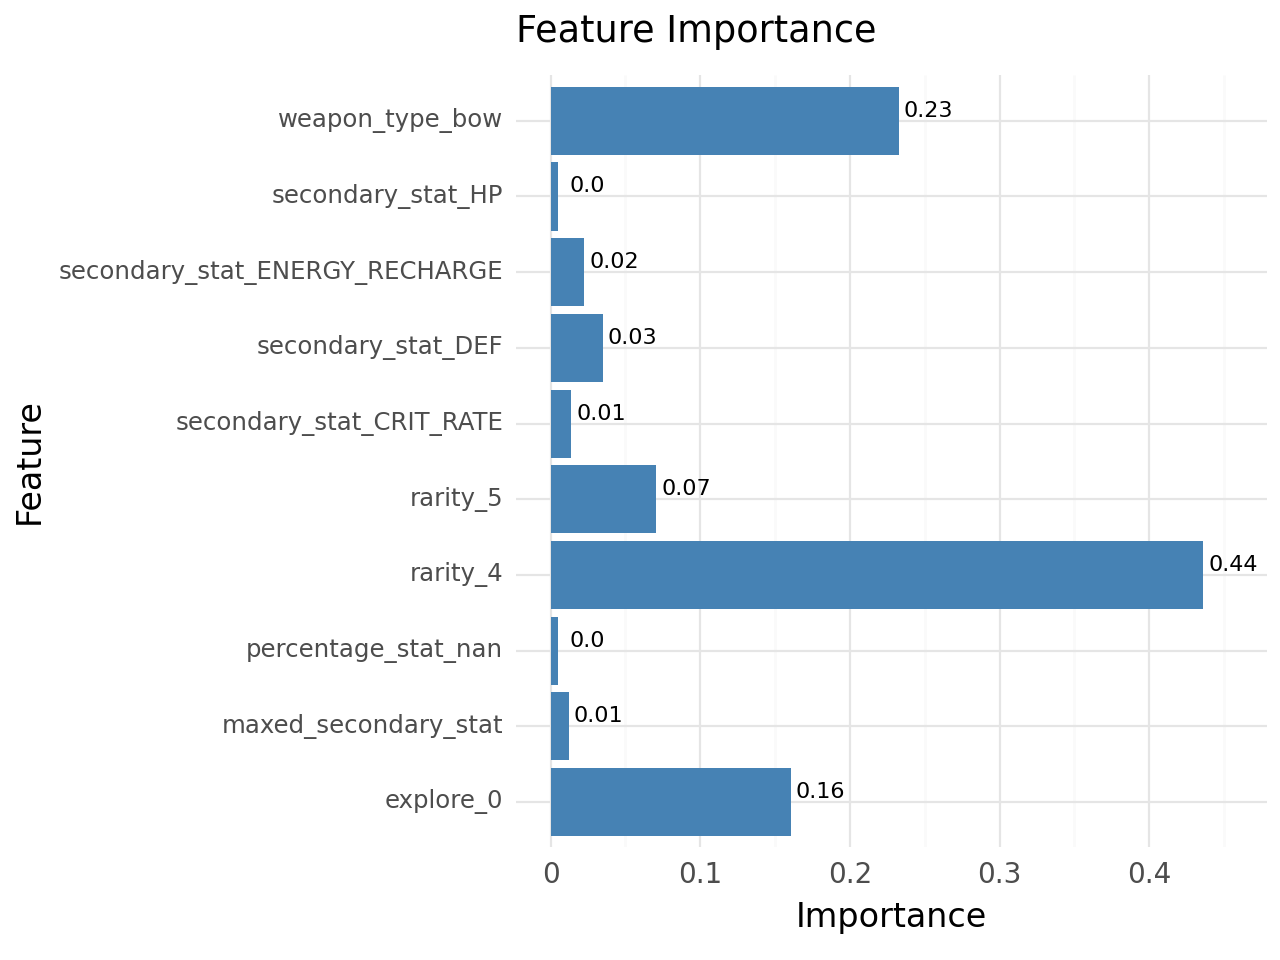

<Figure Size: (640 x 480)>

In [60]:
# Fit the pipeline on the entire dataset
pipe.fit(X, y)

# Access the Gradient Boosting Regressor model from the pipeline
gb_model = pipe.named_steps['tree']

# Access the preprocessor from the pipeline
preprocessor = pipe.named_steps['pre']

# Get the column transformer's output feature names after one-hot encoding
encoded_feature_names = preprocessor.named_transformers_['pipeline'].named_steps['onehot'].get_feature_names_out(input_features=cat)

# Map one-hot encoded feature names back to original features
original_features_mapping = {}
for feature in cat:
    original_feature = feature.split('_')[0]  # Assuming the original feature name is before the first underscore
    if original_feature not in original_features_mapping:
        original_features_mapping[original_feature] = [feature]
    else:
        original_features_mapping[original_feature].append(feature)

# Get the one-hot encoded feature names
encoded_feature_names = preprocessor.named_transformers_['pipeline'].named_steps['onehot'].get_feature_names_out(input_features=cat)

# Create a DataFrame with feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': encoded_feature_names.tolist() + cont,
                                       'Importance': gb_model.feature_importances_})

# Create a DataFrame with feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': encoded_feature_names.tolist() + cont,
                                       'Importance': gb_model.feature_importances_})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Take only the top 10 features
top_features = feature_importance_df.head(10)
print(feature_importance_df)
top_features = top_features.sort_values(by='Importance', ascending=True)
top_features = top_features.reset_index(drop=True)

(ggplot(top_features, aes(x='Feature', y='Importance'))
     + geom_bar(stat='identity', fill='steelblue')
     + geom_text(aes(label=round(top_features['Importance'], 2)), va='bottom', nudge_y=0.02, size=8)
     + theme_minimal()
     + theme(axis_text_x=element_text(size=10),  # Adjust text size on the x-axis
             axis_title=element_text(size=12))   # Adjust axis title size
     + labs(x='Feature', y='Importance')
     + ggtitle('Feature Importance')
     + coord_flip())

In [61]:
# Define the hyperparameter grid
param_dist = {
    'tree__n_estimators': [25, 50, 100, 150],
    'tree__max_depth': [3, 5, 7, 9],
    'tree__min_samples_split': [2, 3, 4, 5, 10, 15],
    'tree__max_leaf_nodes': [2, 5, 10, 20, 50, 100],
    'tree__learning_rate': loguniform(0.01, 1),
}

# use grid search to find best parameters
grid = RandomizedSearchCV(pipe, param_distributions=param_dist, cv = 5, refit = True)

grid.fit(X_train, y_train)

print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__n_estimators"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__max_depth"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__min_samples_split"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__max_leaf_nodes"])
print("RandomizedSearchCV chose: ", grid.best_estimator_.get_params()["tree__learning_rate"])

RandomizedSearchCV chose:  50
RandomizedSearchCV chose:  9
RandomizedSearchCV chose:  4
RandomizedSearchCV chose:  5
RandomizedSearchCV chose:  0.24212492246873266
